In [1]:
# Import dependencies
%matplotlib inline
import os
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import anndata
import scranPY
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt
from typing import List

# Print date and time:
import datetime
e = datetime.datetime.now()
print ("Current date and time = %s" % e)

# set a working directory
wdir = "/Users/alinakurjan/Devel/scRNAseq in Python OBDS (10-14 Feb 2025)/Day 3 Normalisation, Dim Reduction/"
os.chdir( wdir )

# folder structures
QC_FOLDERNAME = "../Day 2 Quality Control/QC/results/"
RESULTS_FOLDERNAME = "Normalisation/results/"
FIGURES_FOLDERNAME = "Normalisation/figures/"

if not os.path.exists(RESULTS_FOLDERNAME):
    os.makedirs(RESULTS_FOLDERNAME)
if not os.path.exists(FIGURES_FOLDERNAME):
    os.makedirs(FIGURES_FOLDERNAME)
    
# Set folder for saving figures into
sc.settings.figdir = FIGURES_FOLDERNAME

# Set other settings
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.set_figure_params(dpi=150, fontsize=10, dpi_save=600)

Current date and time = 2025-02-01 21:42:15.715593
-----
anndata     0.11.3
scanpy      1.10.4
-----
PIL                 11.1.0
appnope             0.1.4
asttokens           NA
clarabel            0.9.0
colorama            0.4.6
comm                0.2.2
cvxpy               1.6.0
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.12
decorator           5.1.1
executing           2.1.0
google              NA
h5py                3.12.1
igraph              0.11.8
ipykernel           6.29.5
jedi                0.19.2
joblib              1.4.2
kiwisolver          1.4.8
legacy_api_wrap     NA
leidenalg           0.10.2
llvmlite            0.43.0
matplotlib          3.10.0
matplotlib_inline   0.1.7
mpl_toolkits        NA
natsort             8.4.0
numba               0.60.0
numpy               1.26.4
osqp                0.6.7.post3
packaging           24.2
pandas              2.2.3
parso               0.8.4
patsy               1.0.1
pickles

In [2]:
adata = sc.read_h5ad(os.path.join(QC_FOLDERNAME, 'filtered_adata.h5ad'))
adata

AnnData object with n_obs × n_vars = 23282 × 27449
    obs: 'samplename', 'sex', 'age', 'donor', 'type', 'libbatch', 'barcode', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

In [3]:
adata.obs

,samplename,sex,age,donor,type,libbatch,barcode,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,...,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,outlier,mt_outlier,doublet_score,predicted_doublet
TGCTCCACAATAGTGA.DEV16569_Ach,CellRanger_DEV16569_Ach_Jan2023,female,20,DEV16569,Ach,Jan2023,TGCTCCACAATAGTGA,3539,3538,8.171599,...,7,2.079442,0.104244,0,0.000000,0.000000,False,False,0.091392,False
ACCCAAACAGCATACT.DEV16569_Ach,CellRanger_DEV16569_Ach_Jan2023,female,20,DEV16569,Ach,Jan2023,ACCCAAACAGCATACT,3375,3374,8.124151,...,13,2.639057,0.192479,0,0.000000,0.000000,False,False,0.066339,False
TTCCTAATCTCTCTAA.DEV16569_Ach,CellRanger_DEV16569_Ach_Jan2023,female,20,DEV16569,Ach,Jan2023,TTCCTAATCTCTCTAA,3394,3393,8.129764,...,12,2.564949,0.180560,1,0.693147,0.015047,False,False,0.082439,False
CCTCACACAGTGGGTA.DEV16569_Ach,CellRanger_DEV16569_Ach_Jan2023,female,20,DEV16569,Ach,Jan2023,CCTCACACAGTGGGTA,3606,3605,8.190354,...,9,2.302585,0.134409,0,0.000000,0.000000,False,False,0.074842,False
TATGTTCTCAAATAGG.DEV16569_Ach,CellRanger_DEV16569_Ach_Jan2023,female,20,DEV16569,Ach,Jan2023,TATGTTCTCAAATAGG,3924,3923,8.274867,...,3,1.386294,0.045774,1,0.693147,0.015258,False,False,0.169399,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CATCGGGTCGTCAAAC.DEV15984_Ach,CellRanger_DEV15984_Ach_Sep2022,male,40,DEV15984,Ach,Sep2022,CATCGGGTCGTCAAAC,358,357,5.880533,...,0,0.000000,0.000000,0,0.000000,0.000000,False,False,0.022591,False
TGATGCAAGGGCGAAG.DEV15984_Ach,CellRanger_DEV15984_Ach_Sep2022,male,40,DEV15984,Ach,Sep2022,TGATGCAAGGGCGAAG,339,338,5.826000,...,0,0.000000,0.000000,0,0.000000,0.000000,False,False,0.016337,False
CCTAAGATCGGAATTC.DEV15984_Ach,CellRanger_DEV15984_Ach_Sep2022,male,40,DEV15984,Ach,Sep2022,CCTAAGATCGGAATTC,374,373,5.924256,...,0,0.000000,0.000000,0,0.000000,0.000000,False,False,0.025217,False
ATCATTCGTCTTGAGT.DEV15984_Ach,CellRanger_DEV15984_Ach_Sep2022,male,40,DEV15984,Ach,Sep2022,ATCATTCGTCTTGAGT,383,382,5.948035,...,1,0.693147,0.237530,0,0.000000,0.000000,False,False,0.018195,False


In [4]:
adata.var

""
Gene
A1BG
A1BG-AS1
A1CF
A2M
A2M-AS1
...
ZXDC
ZYG11A
ZYG11B


### 1) Check the counts by printing the first 5 rows and columns. Have they been transformed?

In [5]:
print(adata.X[0:5, 0:5])

[[-0.07263619 -0.06071864 -0.03201912  0.94333964 -0.0388234 ]
 [-0.07263619 -0.06071864 -0.03201912 -0.15743962 -0.0388234 ]
 [-0.07263619 -0.06071864 -0.03201912 -0.15743962 -0.0388234 ]
 [-0.07263619  3.04510178 -0.03201912 -0.15743962 -0.0388234 ]
 [-0.07263619 -0.06071864 -0.03201912  0.96860955 -0.0388234 ]]


### 2) If the counts have been transformed in any way, use the original 'counts' layer to restore the raw, unnormalized counts in adata.X. Print the first 5 rows and columns to check the output.

In [6]:
adata.X = adata.layers['counts'].copy()
print(adata.X[0:5, 0:5])

<Compressed Sparse Row sparse matrix of dtype 'int32'
	with 3 stored elements and shape (5, 5)>
  Coords	Values
  (0, 3)	1
  (3, 1)	1
  (4, 3)	1


# PART1: Comparison of normalisation methods

### 3) Without altering the counts in adata.X, create a new object containing CP10k-normalised counts by performing common depth normalisation to counts per 10,000. Print out the first 5 rows and columns to check what changed.

<details>
<summary>Click to reveal hint</summary>

_For this, use the sc.pp.normalize_total() function. Check the parameters with SHIFT+TAB, make sure you understand what to specify in target_sum and inplace parameters. Inspect the output object. What is it? Where are the normalised counts and how can you access them?_

</details>

In [7]:
cp10k = sc.pp.normalize_total(adata, target_sum=1e4, inplace=False)
print(cp10k)
print(cp10k['X'][0:5, 0:5])

normalizing counts per cell
    finished (0:00:00)
{'X': <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 28032328 stored elements and shape (23282, 27449)>, 'norm_factor': array([6715, 6754, 6646, ...,  413,  421,  402])}
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (5, 5)>
  Coords	Values
  (0, 3)	1.4892032762472078
  (3, 1)	1.4934289127837514
  (4, 3)	1.5257857796765335


### Next, create a new anndata layer called 'log1pCP10k' by running sc.pp.log1p() on the normalised counts. Check the parameters, make sure you understand what to specify in the copy parameter. Print out the first 5 rows and columns of adata.X and adata.layers['log1pCP10k'] counts.

In [8]:
adata.layers['log1pCP10k'] = sc.pp.log1p(cp10k['X'], copy=True)
print(adata.X[0:5, 0:5])
print(adata.layers['log1pCP10k'][0:5, 0:5])

<Compressed Sparse Row sparse matrix of dtype 'int32'
	with 3 stored elements and shape (5, 5)>
  Coords	Values
  (0, 3)	1
  (3, 1)	1
  (4, 3)	1
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (5, 5)>
  Coords	Values
  (0, 3)	0.911962689896861
  (3, 1)	0.9136588365877254
  (4, 3)	0.9265522141865812


### 4) Like before, use the same functions with a different target_sum specified to perform shifted logarithm normalisation based on the delta method (also known as log1pPF) into a new layer called 'log1pPF'. This time, modify the adata.X counts inplace. Print out the first 5 rows and columns of adata.X and adata.layers['log1pPF'] counts.

In [9]:
sc.pp.normalize_total(adata, target_sum=None, inplace=True)
sc.pp.log1p(adata, copy=False)
adata.layers['log1pPF'] = adata.X.copy()
print(adata.X[0:5, 0:5])
print(adata.layers['log1pPF'][0:5, 0:5])

normalizing counts per cell
    finished (0:00:00)
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (5, 5)>
  Coords	Values
  (0, 3)	0.1977150015700438
  (3, 1)	0.19822391176042417
  (4, 3)	0.20211221707123828
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (5, 5)>
  Coords	Values
  (0, 3)	0.1977150015700438
  (3, 1)	0.19822391176042417
  (4, 3)	0.20211221707123828


### 5) Perform normalisation of raw adata counts using analytic pearson residuals. For this, use the experimental module of scanpy (sc.experimental.pp.normalize_pearson_residuals()), saving the output of this function into a new object called analytic_pearson. Check function parameters. Explore the resulting object. What is its type and where are the normalised counts stored?

Info here:
https://scanpy.readthedocs.io/en/stable/tutorials/experimental/pearson_residuals.html

<details>
<summary>Click to reveal hint</summary>

_To use unnormalised counts, specify the layer parameter as 'counts' within the sc.experimental.pp.normalize_pearson_residuals() function. Otherwise, restore them by copying the counts layer back into adata.X_
</details>

In [10]:
analytic_pearson = sc.experimental.pp.normalize_pearson_residuals(adata, inplace=False, layer='counts')
analytic_pearson

computing analytic Pearson residuals on counts


/opt/homebrew/Caskroom/miniforge/base/envs/scvitools/lib/python3.12/site-packages/scanpy/experimental/pp/_normalization.py:70: RuntimeWarning: invalid value encountered in divide
  residuals = diff / np.sqrt(mu + mu**2 / theta)


    finished (0:00:04)


{'X': array([[-0.15815846, -0.12874454, -0.07637163, ...,  0.49420034,
         -0.31327786, -0.76628731],
        [-0.15861696, -0.1291178 , -0.07659308, ..., -0.78226723,
          2.86550691,  0.52506133],
        [-0.15734398, -0.12808148, -0.07597826, ...,  1.78568862,
         -0.31166574,  1.84581124],
        ...,
        [-0.03922793, -0.03193115, -0.0189407 , ..., -0.19399958,
         -0.07772878, -0.19056521],
        [-0.03960604, -0.03223893, -0.01912326, ..., -0.19586879,
         -0.07847794, -0.19240135],
        [-0.03870201, -0.03150306, -0.01868676, ..., -0.19139958,
         -0.07668672, -0.1880112 ]]),
 'theta': 100,
 'clip': None,
 'computed_on': 'counts'}

##### Some of the values will be NaN. This is due to:
- Genes with zero variance (e.g., all values in a gene are the same or zero).
- Cells with total counts too low, leading to division by zero.
- Log transformations of zero values, which are undefined.

You can check the number of NaNs by running the following:

In [11]:
np.isnan(analytic_pearson["X"]).sum()

628614

### Convert the pearson residual counts with NaN values into 0. This will not affect the data, but will enable further analysis.

In [12]:
nonans = np.nan_to_num(analytic_pearson["X"], nan=0, posinf=0, neginf=0)
np.isnan(nonans).sum()

0

### Now, convert the resulting dense array into a sparse matrix using csr_matrix() and add it as a new counts layer called 'pearson_residuals' to the adata. Print out the first 5 rows and columns of adata.X and adata.layers['pearson_residuals'] counts.

In [13]:
adata.layers["pearson_residuals"] = csr_matrix(nonans)
print(adata.X[0:5, 0:5])
print(adata.layers["pearson_residuals"][0:5, 0:5])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (5, 5)>
  Coords	Values
  (0, 3)	0.1977150015700438
  (3, 1)	0.19822391176042417
  (4, 3)	0.20211221707123828
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 25 stored elements and shape (5, 5)>
  Coords	Values
  (0, 0)	-0.15815845676675727
  (0, 1)	-0.12874454092142737
  (0, 2)	-0.07637163235799703
  (0, 3)	1.2215080868082582
  (0, 4)	-0.11421787430163115
  (1, 0)	-0.15861696028939987
  (1, 1)	-0.12911780474284396
  (1, 2)	-0.07659307742532129
  (1, 3)	-0.561285983233077
  (1, 4)	-0.11454903328864091
  (2, 0)	-0.15734398195414273
  (2, 1)	-0.12808148457310498
  (2, 2)	-0.07597826348876409
  (2, 3)	-0.5567942948864723
  (2, 4)	-0.11362961215961671
  (3, 0)	-0.15793460056886277
  (3, 1)	7.648482018242516
  (3, 2)	-0.07626351587298906
  (3, 3)	-0.5588783242132375
  (3, 4)	-0.11405619193582962
  (4, 0)	-0.15625140495186055
  (4, 1)	-0.12719202917619574
  (4, 2)	-0.07545058075332754
  (4

### Free up memory by removing counts objects we no longer need.

In [14]:
del analytic_pearson, cp10k, nonans

### 6) Perform scran pool size factor deconvolution normalisation using the scranPY.compute_sum_factors() function.
Info here: https://github.com/sfortma2/scranPY/tree/main


### For scranPY to work correctly, raw counts will need to first be converted into a dense array with value type of float64. You can do this as follows:

In [15]:
adata.X = adata.layers['counts'].toarray()
adata.X = adata.X.astype(np.float64)
adata.X

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 2., 0., 2.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Use the scranPY.compute_sum_factors() function with your anndata object. Since we do not have our potential clusters annotated yet, we set them to None when running scranPY. Use the following parameters and note that we are not normalising or log-transforming counts yet. This is because we will manually edit the output of the function -  a NumPy array of size factors stored in adata.obs['size_factors'].

Clusters is set to None
Using max_size =  3000 , clusters have been split into  8  clusters.
min_mean =  0.1
--- 1.69 mins ---
size factor min =  0.06611340611821555
size factor max =  10.35760545962759
Saved plots to: Normalisation/figures//scranPY_normalization.pdf


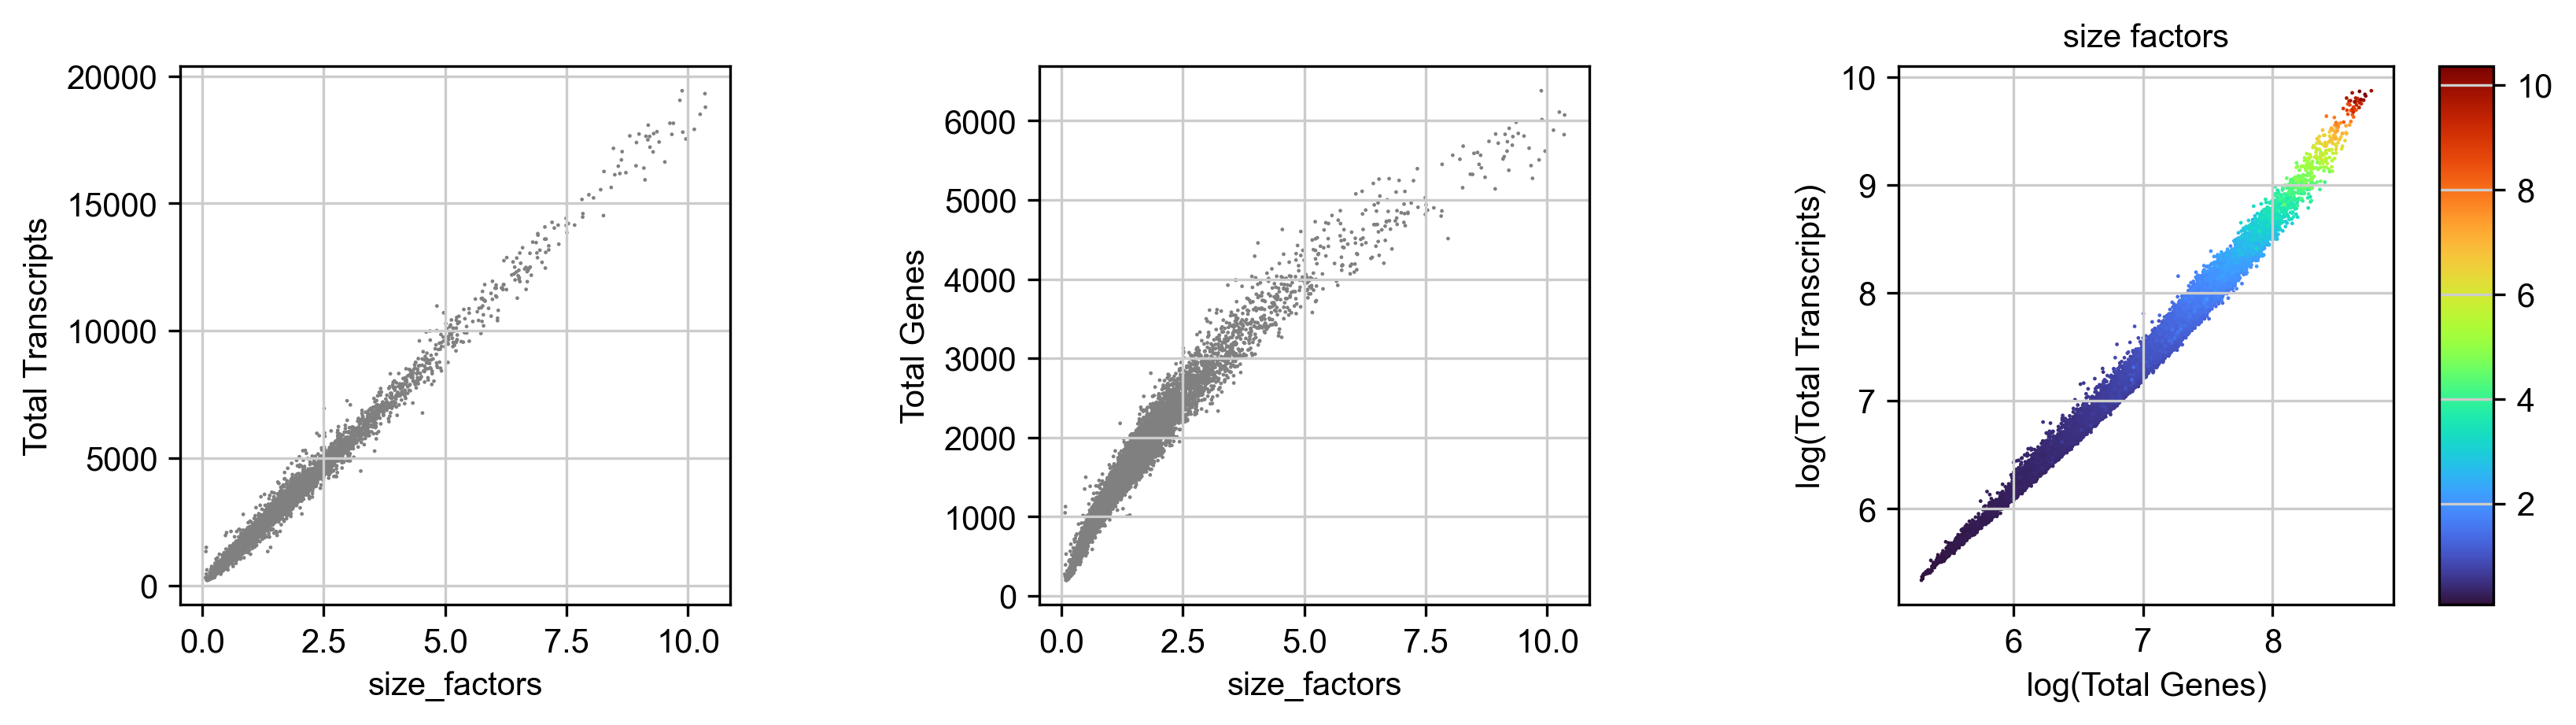

array([3.48224465, 3.28793764, 3.55028424, ..., 0.20486448, 0.21214922,
       0.22143919])

<Figure size 600x600 with 0 Axes>

In [16]:
scranPY.compute_sum_factors(adata, clusters=None, parallelize=True, algorithm='CVXPY', sizes=np.arange(21, 102, 5), 
                            max_size=3000, min_mean=None, plotting=True, lower_bound=0.1, 
                            normalize_counts=False, log1p=False, layer='scranPY', 
                            save_plots_dir=FIGURES_FOLDERNAME, stopwatch=True)

In [17]:
#check the size factors:
adata.obs["size_factors"] 

TGCTCCACAATAGTGA.DEV16569_Ach    3.482245
ACCCAAACAGCATACT.DEV16569_Ach    3.287938
TTCCTAATCTCTCTAA.DEV16569_Ach    3.550284
CCTCACACAGTGGGTA.DEV16569_Ach    3.630555
TATGTTCTCAAATAGG.DEV16569_Ach    3.424754
                                   ...   
CATCGGGTCGTCAAAC.DEV15984_Ach    0.215686
TGATGCAAGGGCGAAG.DEV15984_Ach    0.211260
CCTAAGATCGGAATTC.DEV15984_Ach    0.204864
ATCATTCGTCTTGAGT.DEV15984_Ach    0.212149
GTTCCGTTCCCTAGGG.DEV15984_Ach    0.221439
Name: size_factors, Length: 23282, dtype: float64

Now, we perform library size normalization on the adata.X matrix by dividing each cell’s gene expression counts by its corresponding scran size factor.

In [18]:
# The .values attribute is used to access the underlying NumPy array representation of the data stored in adata.obs size_factors DataFrame column. 
# The [:, None] part is used to reshape the resulting 1-dimensional array into a 2-dimensional array with a single column.
# The resulting shape of size_factors matches the adata.X shape
# The division adata.X / adata.obs["size_factors"].values[:, None] scales the expression values for each gene in each cell by the corresponding size factor. 
scran = adata.X / adata.obs["size_factors"].values[:, None]
scran

array([[0.        , 0.        , 0.        , ..., 0.28717109, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.30414202,
        0.30414202],
       [0.        , 0.        , 0.        , ..., 0.56333518, 0.        ,
        0.56333518],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
# we perform log-transformation of normalised counts, and convert from a dense array into a sparce matrix
adata.layers["scranPY"] = csr_matrix(sc.pp.log1p(scran))

In [20]:
# we return the adata.X counts to their original sparse state by retrieving a copy from the layers.
adata.X = adata.layers['counts'].copy()

### Print out the first 5 rows and columns of adata.X and adata.layers['scranPY'] counts.

In [21]:
print(adata.X[0:5, 0:5])
print(adata.layers["scranPY"][0:5, 0:5])

<Compressed Sparse Row sparse matrix of dtype 'int32'
	with 3 stored elements and shape (5, 5)>
  Coords	Values
  (0, 3)	1
  (3, 1)	1
  (4, 3)	1
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (5, 5)>
  Coords	Values
  (0, 3)	0.25244685837042874
  (3, 1)	0.2432911887437752
  (4, 3)	0.2561850535891846


### 7) Plot the count distributions of raw and normalised counts to visualise changes. What do you notice?

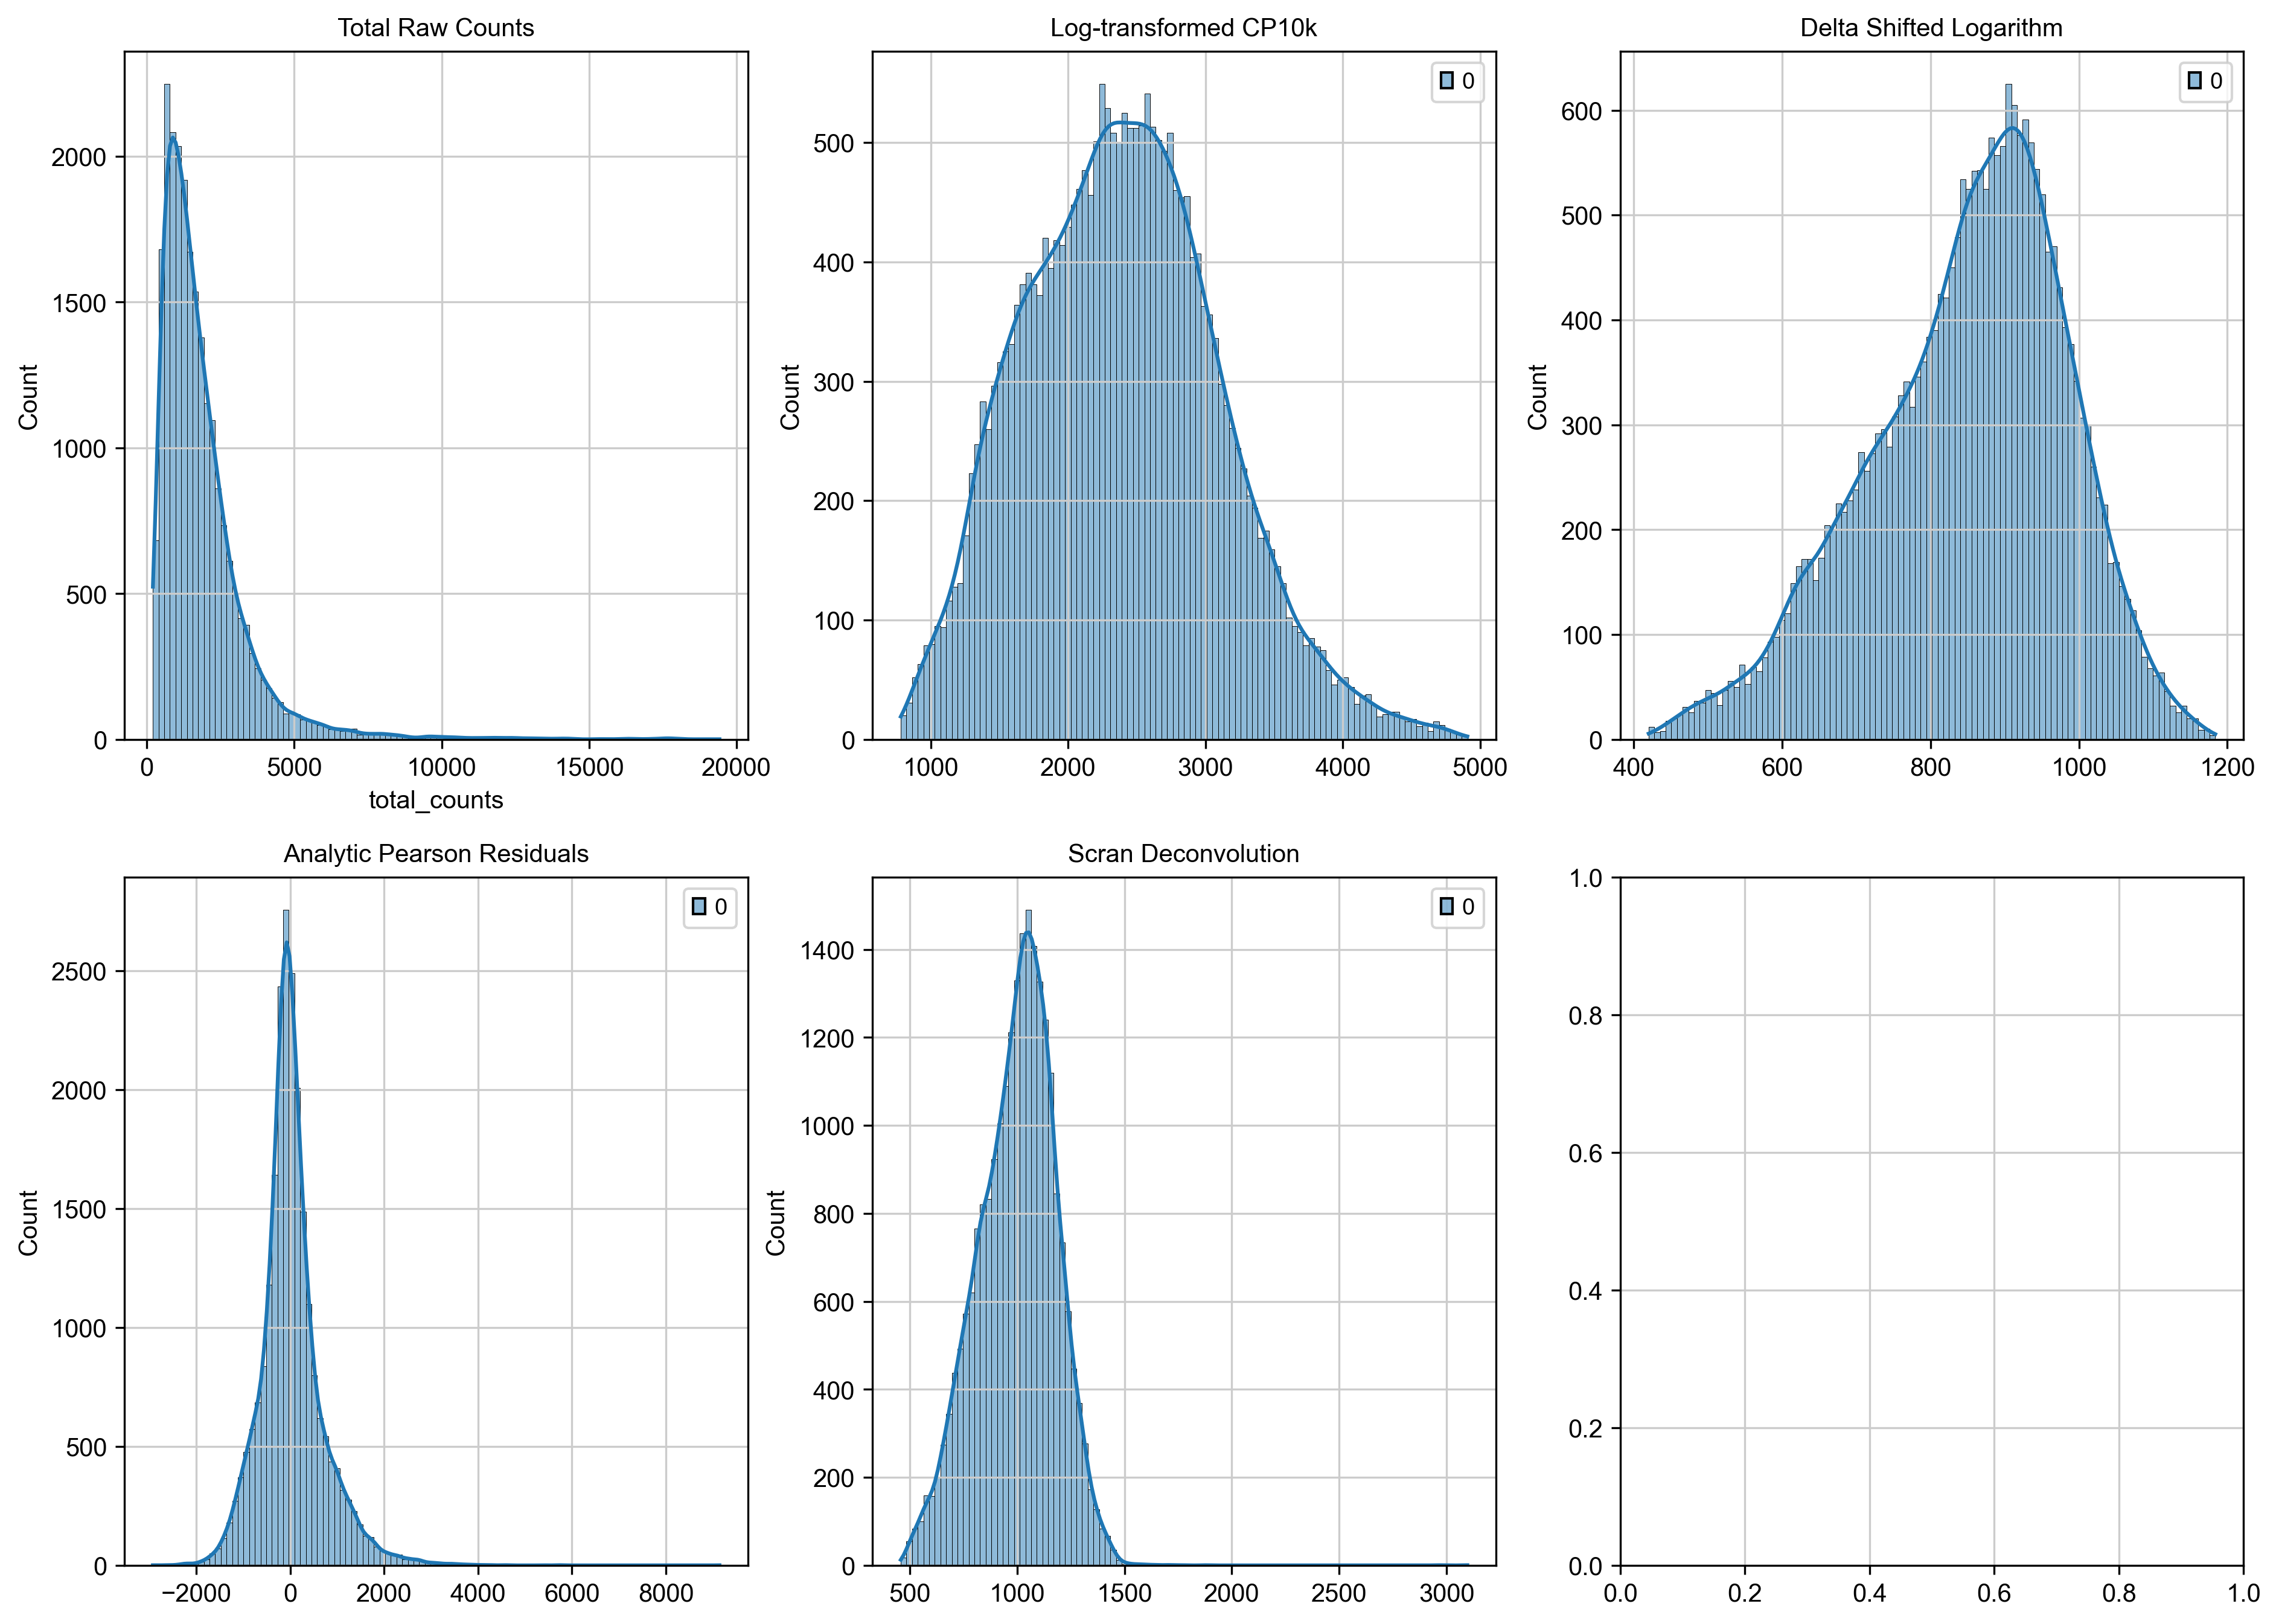

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(15, 11))
p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=True, ax=axes[0,0]) 
axes[0,0].set_title("Total Raw Counts")
p2 = sns.histplot(adata.layers["log1pCP10k"].sum(1), bins=100, kde=True, ax=axes[0,1])
axes[0,1].set_title("Log-transformed CP10k")
p3 = sns.histplot(adata.layers["log1pPF"].sum(1), bins=100, kde=True, ax=axes[0,2])
axes[0,2].set_title("Delta Shifted Logarithm")
p4 = sns.histplot(adata.layers["pearson_residuals"].sum(1), bins=100, kde=True, ax=axes[1,0])
axes[1,0].set_title("Analytic Pearson Residuals")
p5 = sns.histplot(adata.layers["scranPY"].sum(1), bins=100, kde=True, ax=axes[1,1])
axes[1,1].set_title("Scran Deconvolution")
plt.show()

### 8) Plot the gene distributions for the raw and normalised counts to visualise gene count distribution changes using the following code for F13A1 (a marker of developing macrophages) and COL1A1 (main tendon fibroblast gene):

In [23]:
def gene_count_histograms(gene, countslayers, ylims=None):
    counts_dict={}
    for layer in countslayers:
        counts_dict[layer] = adata[:, gene].layers[layer]

    for i, (layer, counts) in enumerate(counts_dict.items()):
        if layer == 'counts':
            binwidth = 1
        else:
            binwidth = 0.1
            
        dense_counts = np.asarray(counts.todense()).flatten()
        bin_edges = np.arange(dense_counts.min(), dense_counts.max(),binwidth)  
        plt.figure(figsize=(8, 3))
        sns.histplot(dense_counts, bins=bin_edges, 
                     color='skyblue', edgecolor='black')
        plt.ylabel(f'Number of Barcodes:{layer}')
        plt.xlabel(f'{gene} UMI Counts')
        
        # Set y-axis limits based on the provided list or default to (0, max_limit)
        max_limit = ylims[i] if ylims and i < len(ylims) else 250
        plt.ylim(0, max_limit)
        
        plt.show()

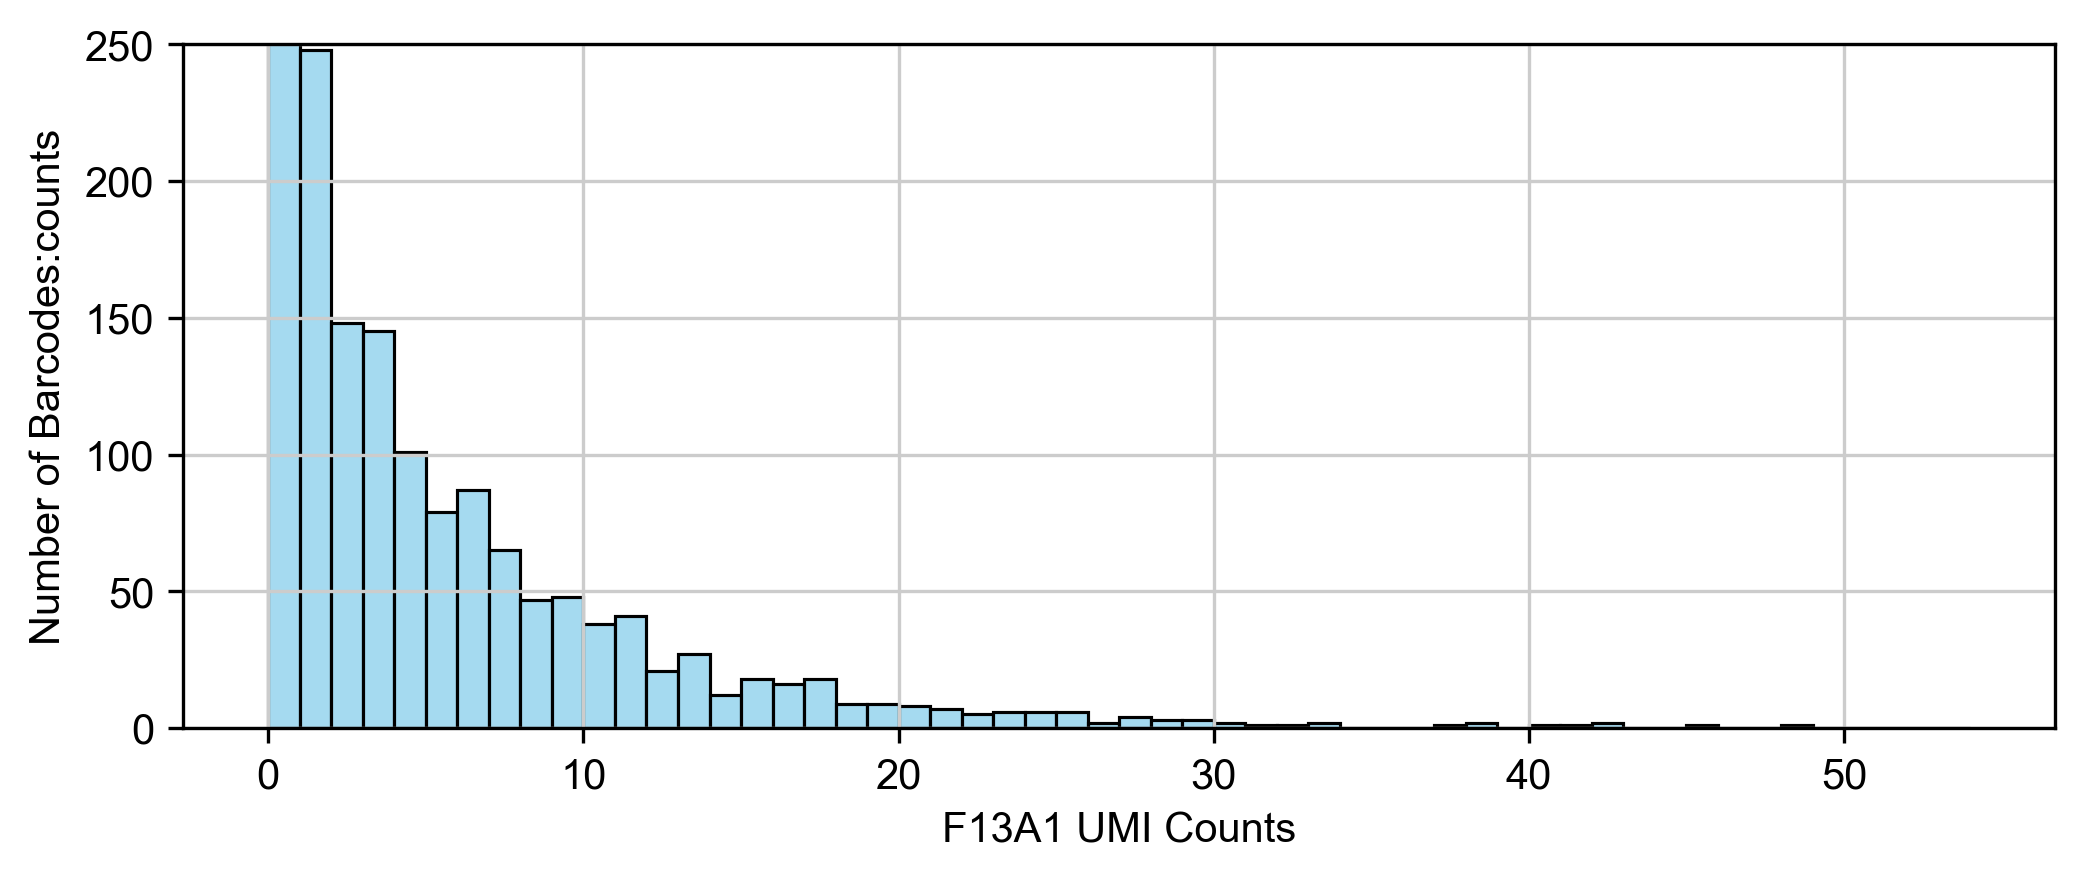

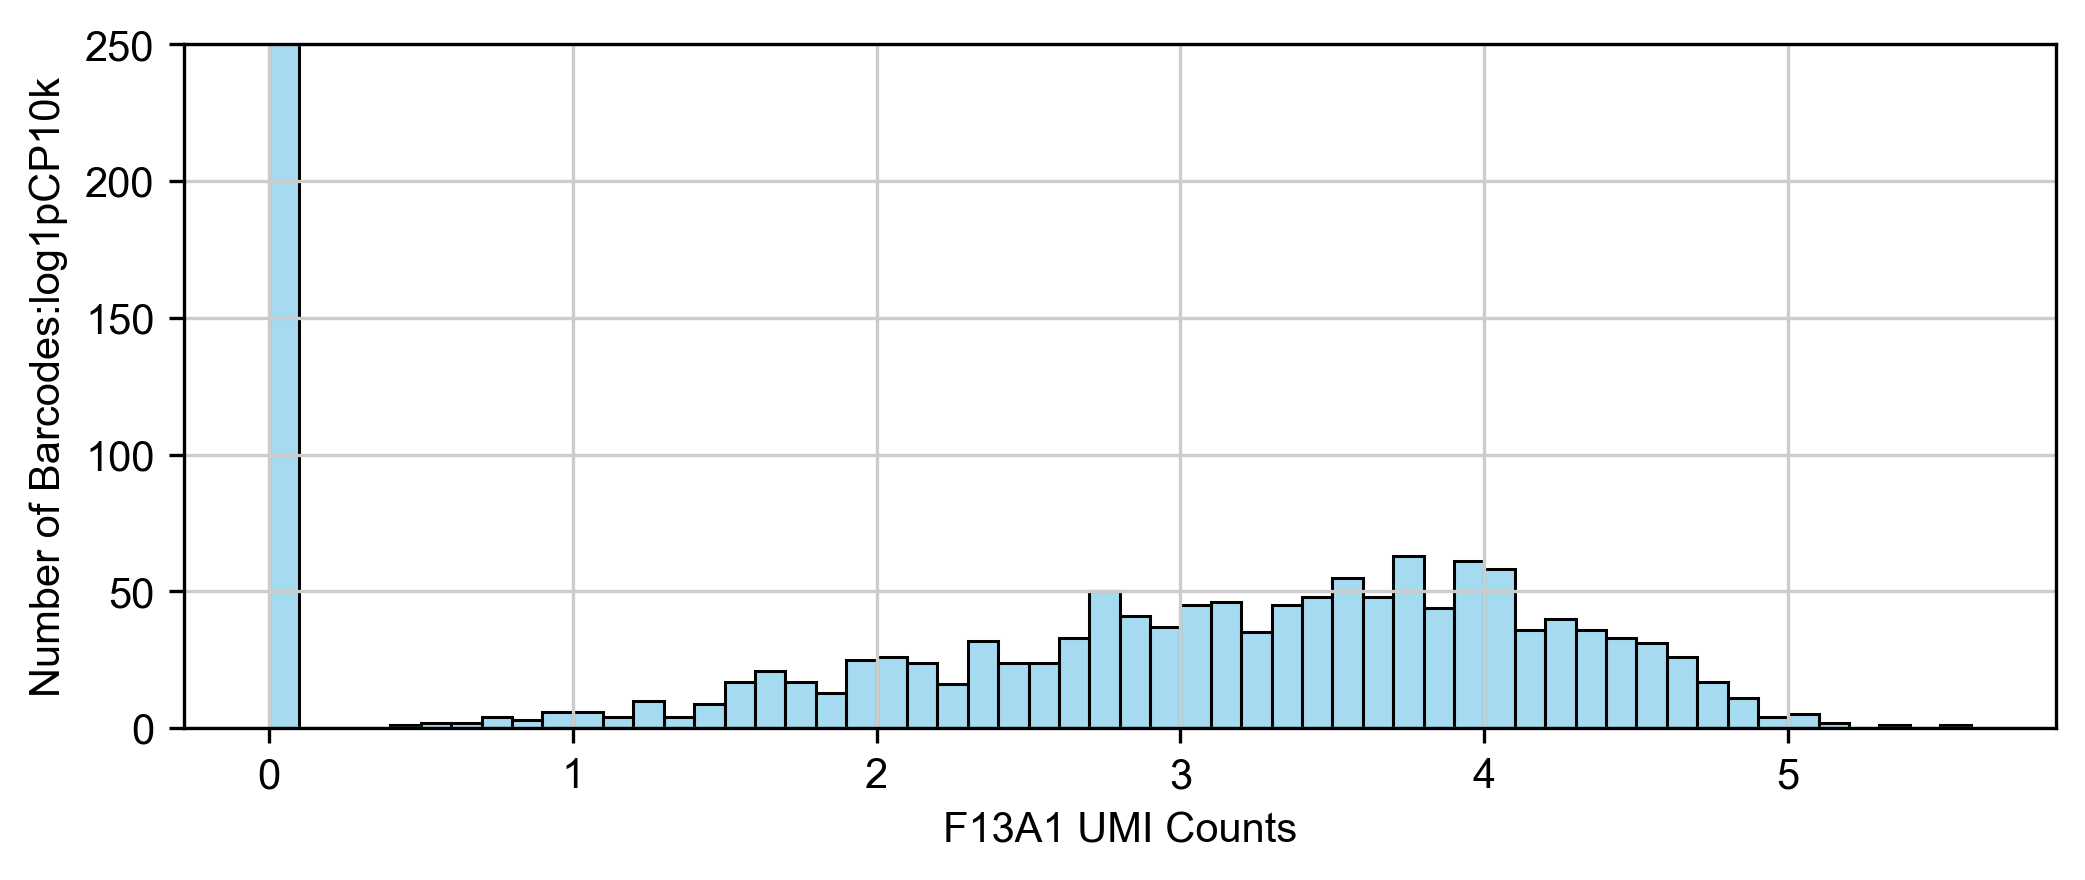

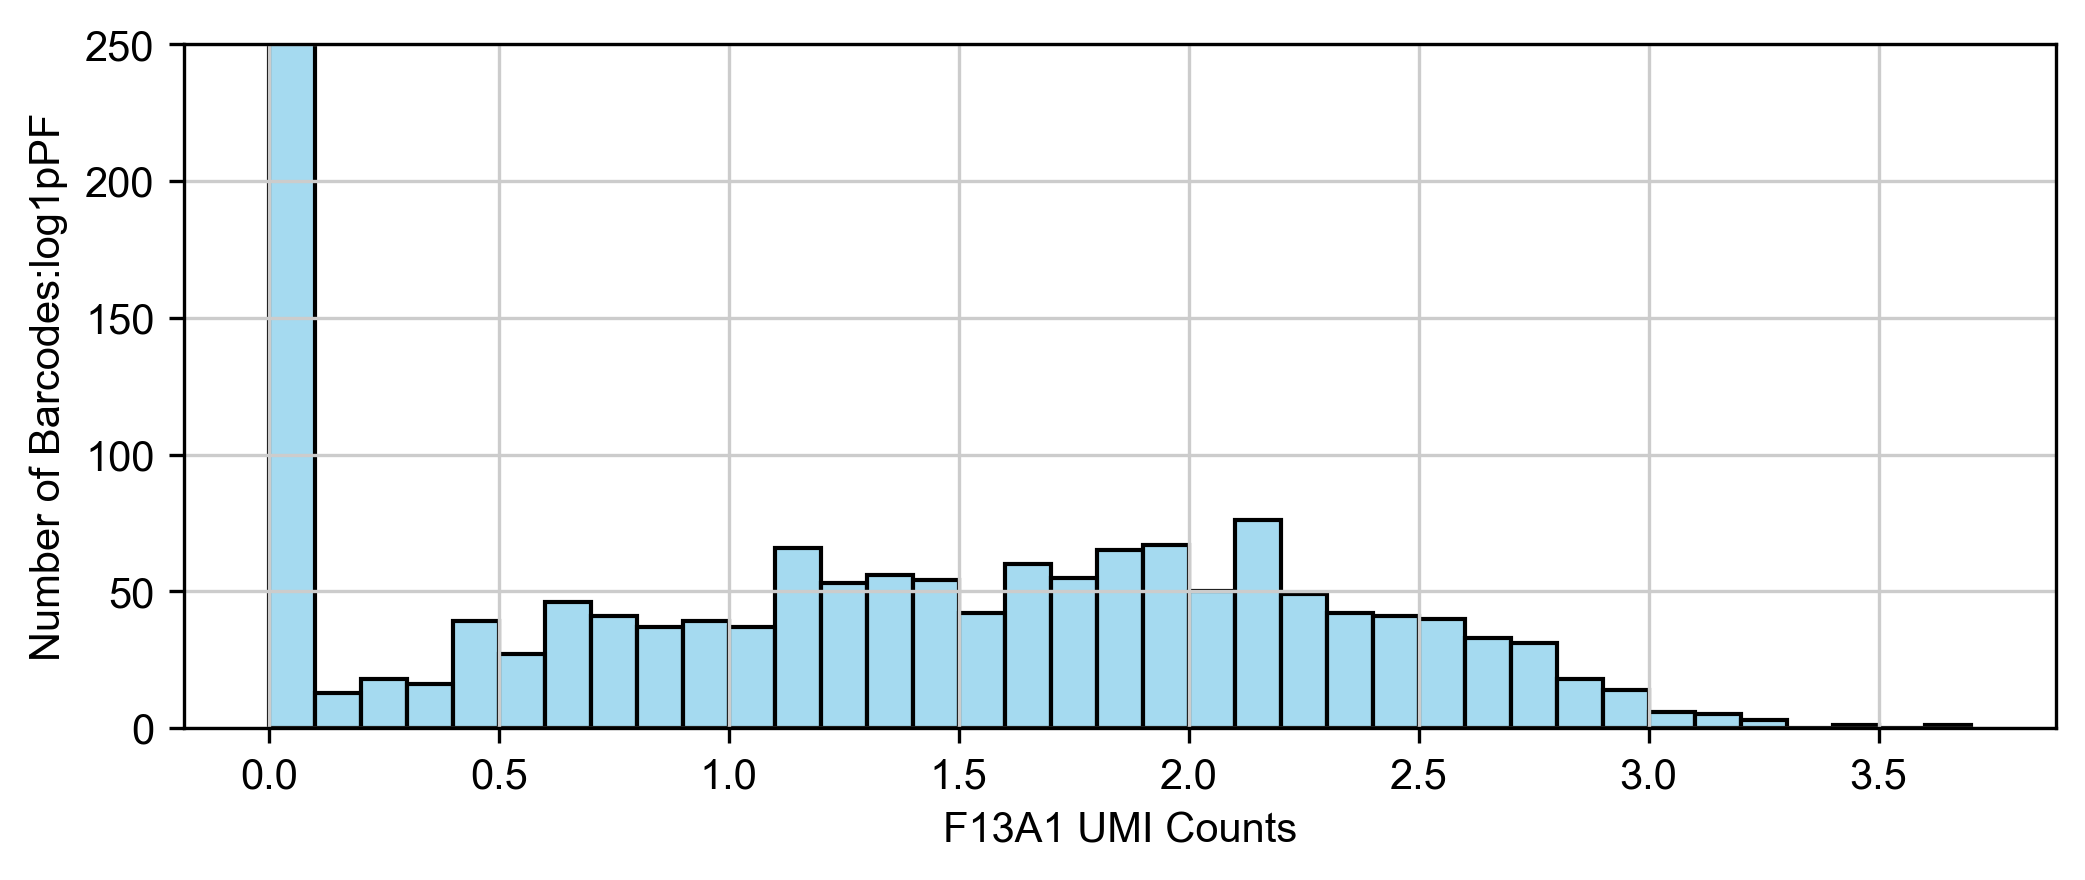

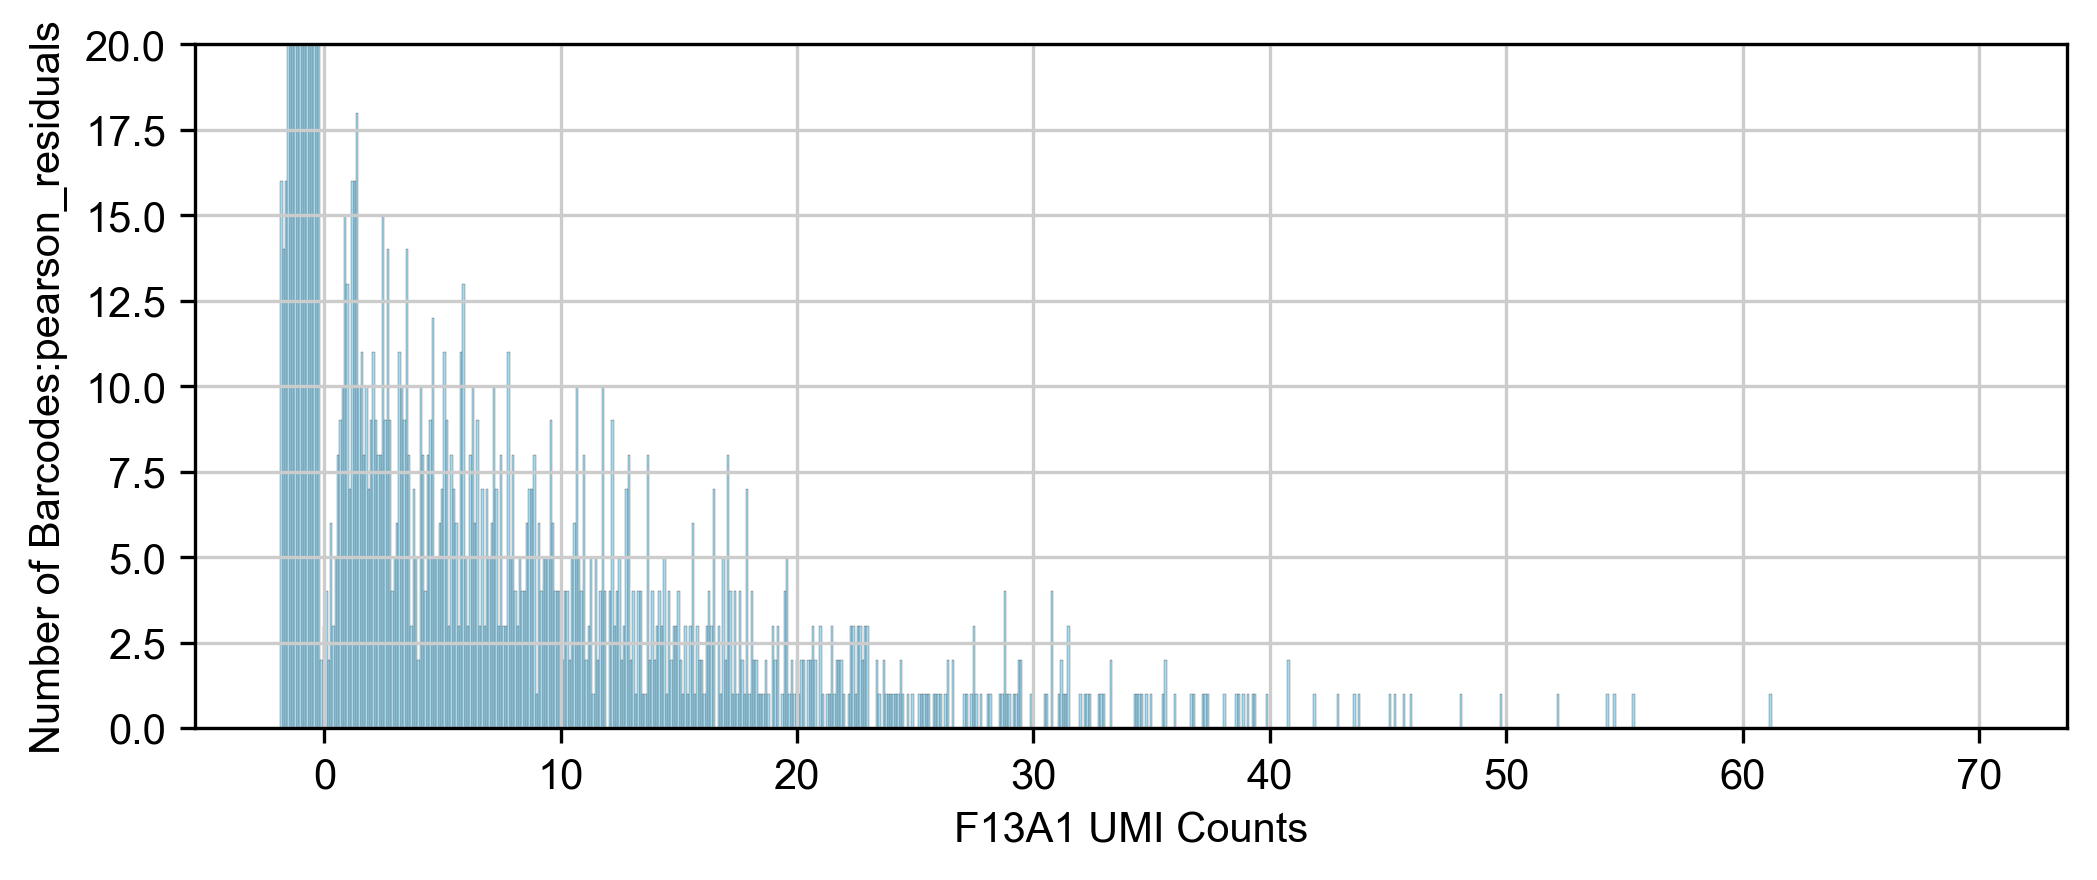

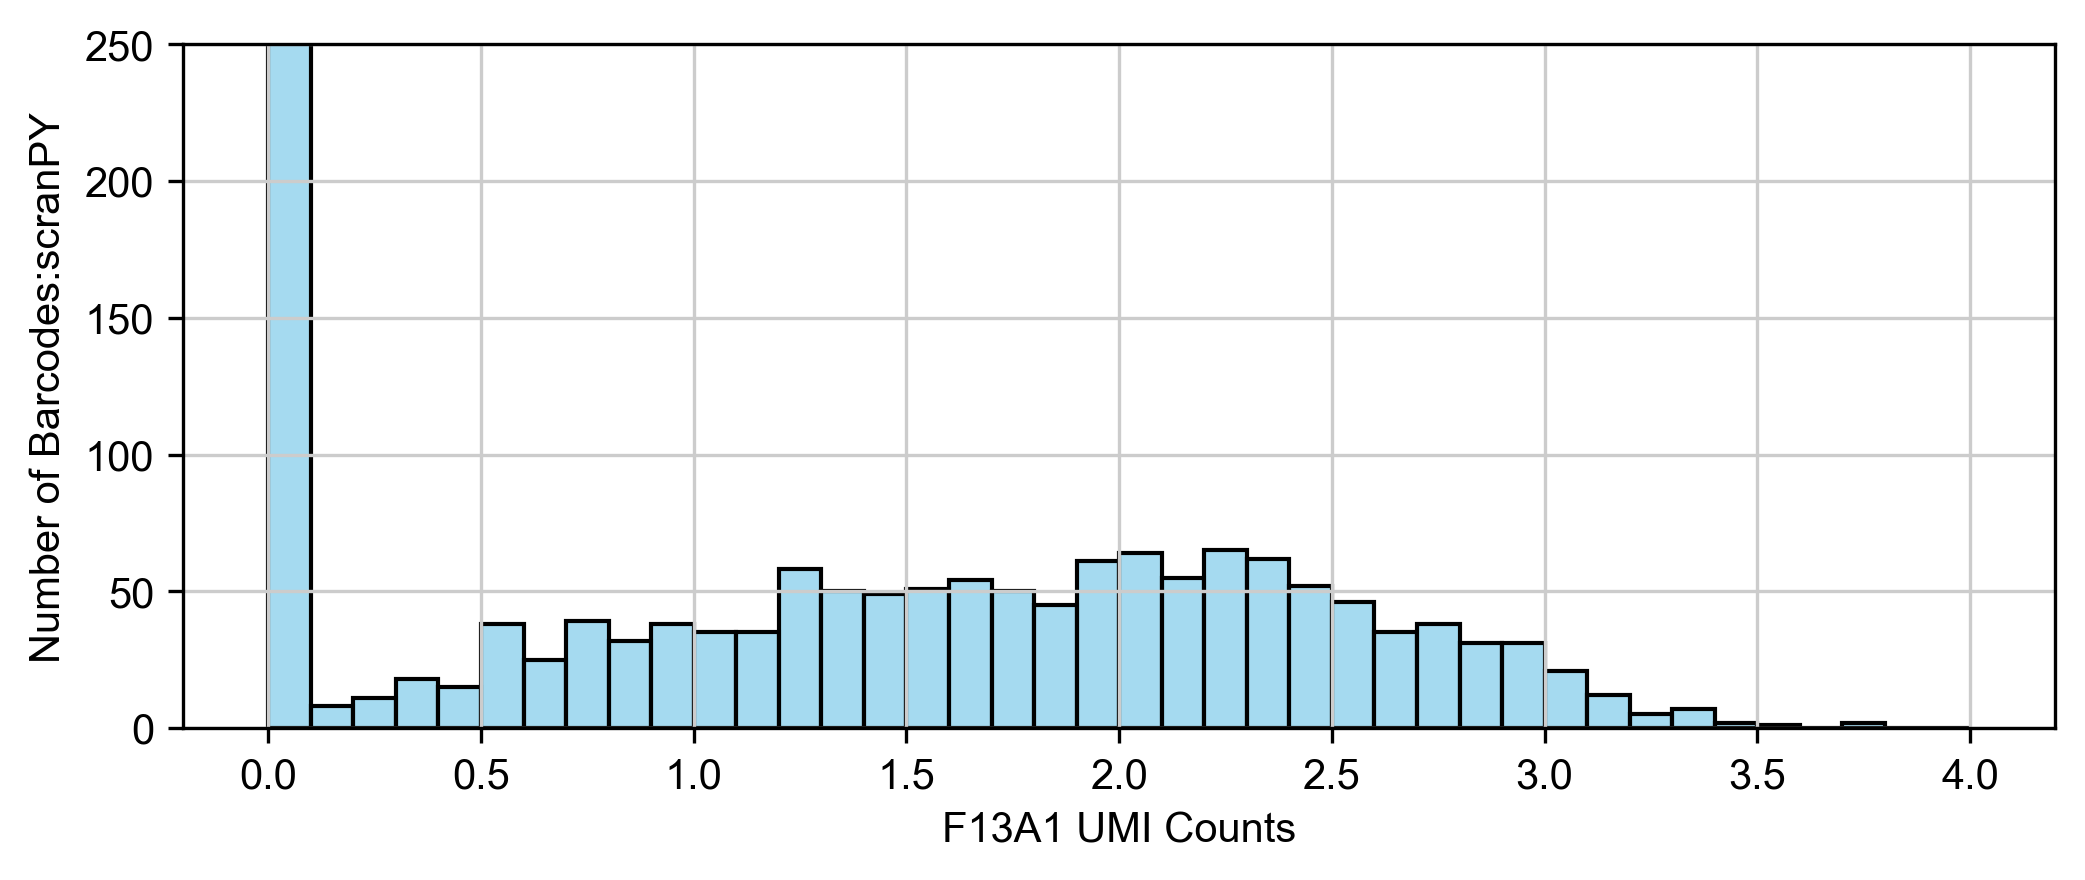

In [24]:
gene_count_histograms('F13A1', ['counts', 'log1pCP10k', 'log1pPF', 'pearson_residuals', 'scranPY'], [250,250,250,20,250])

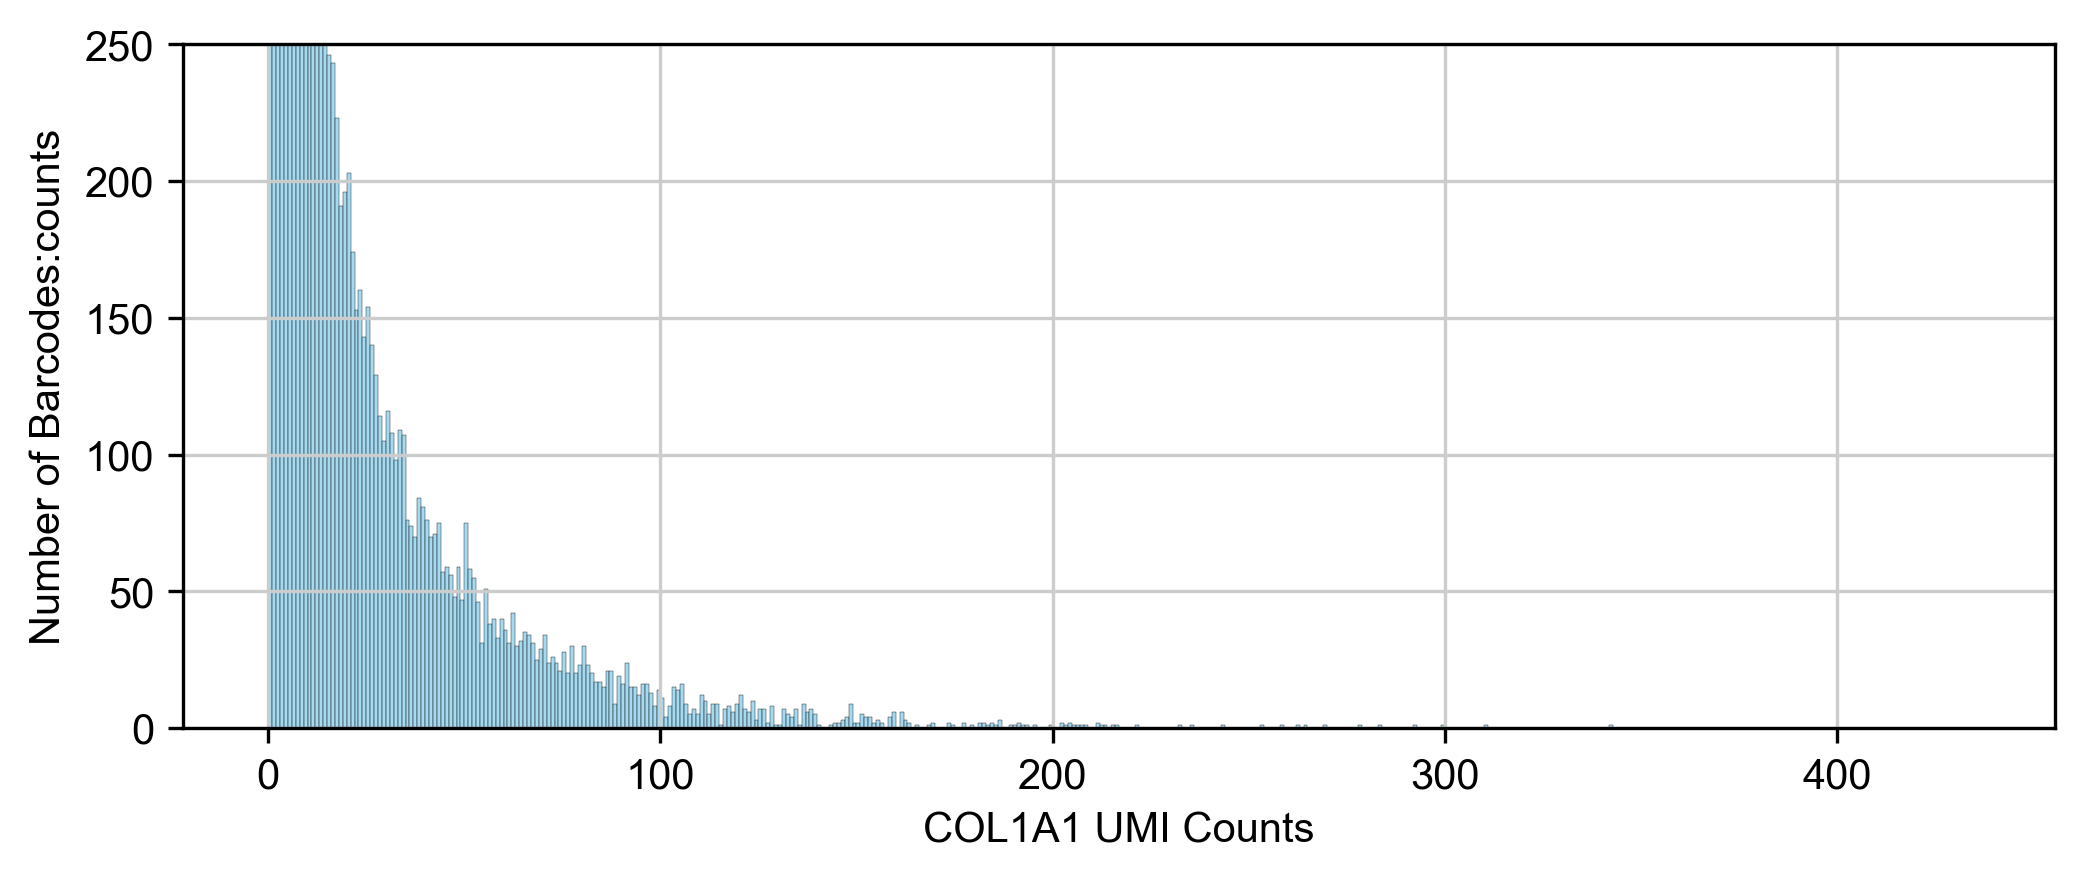

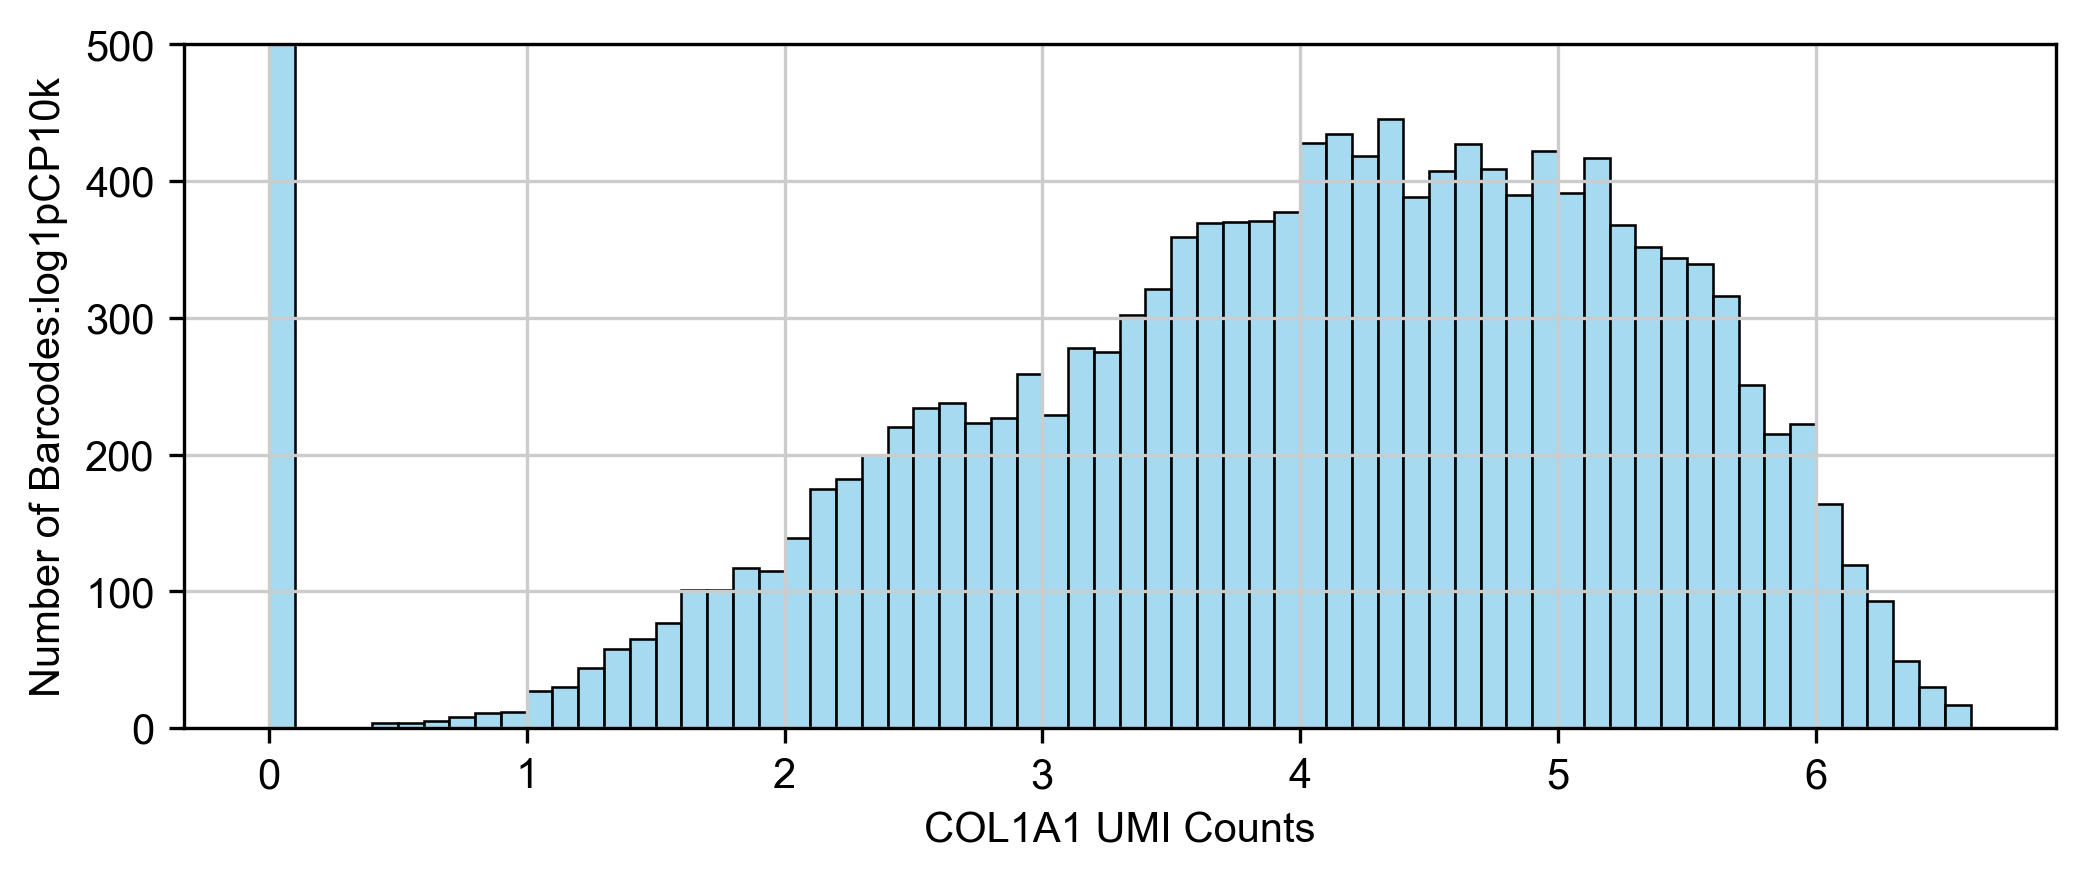

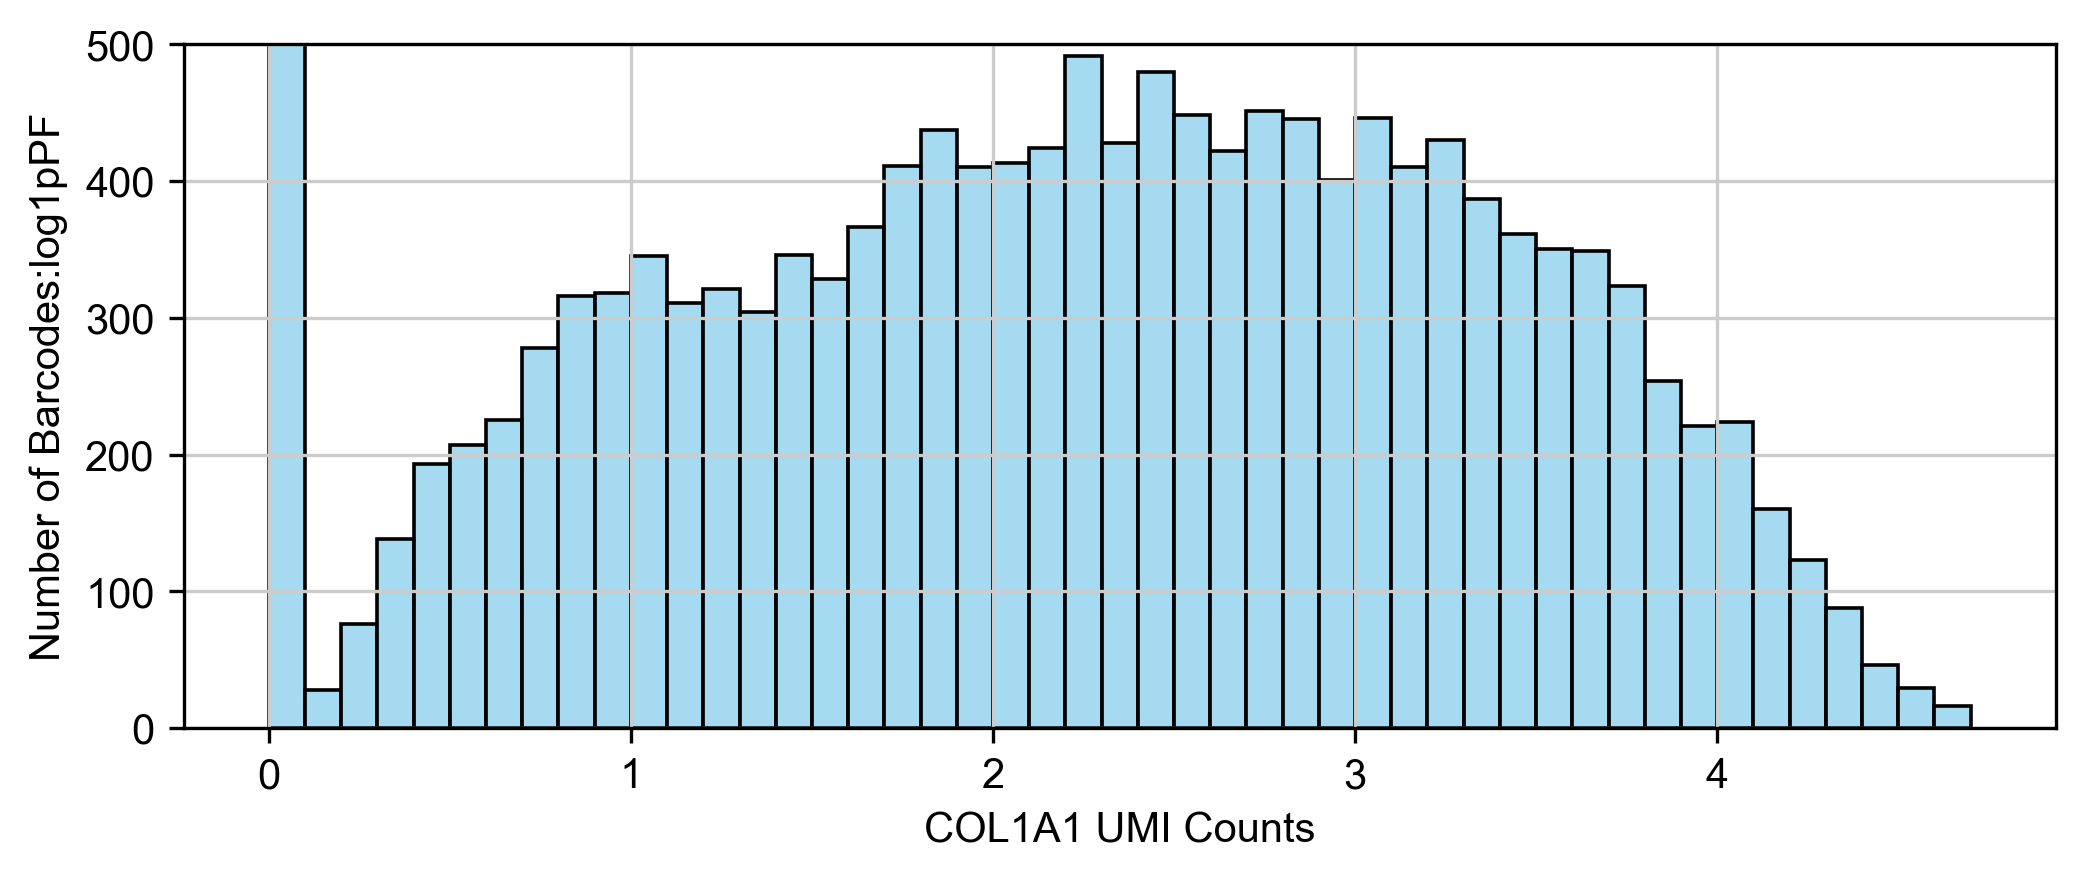

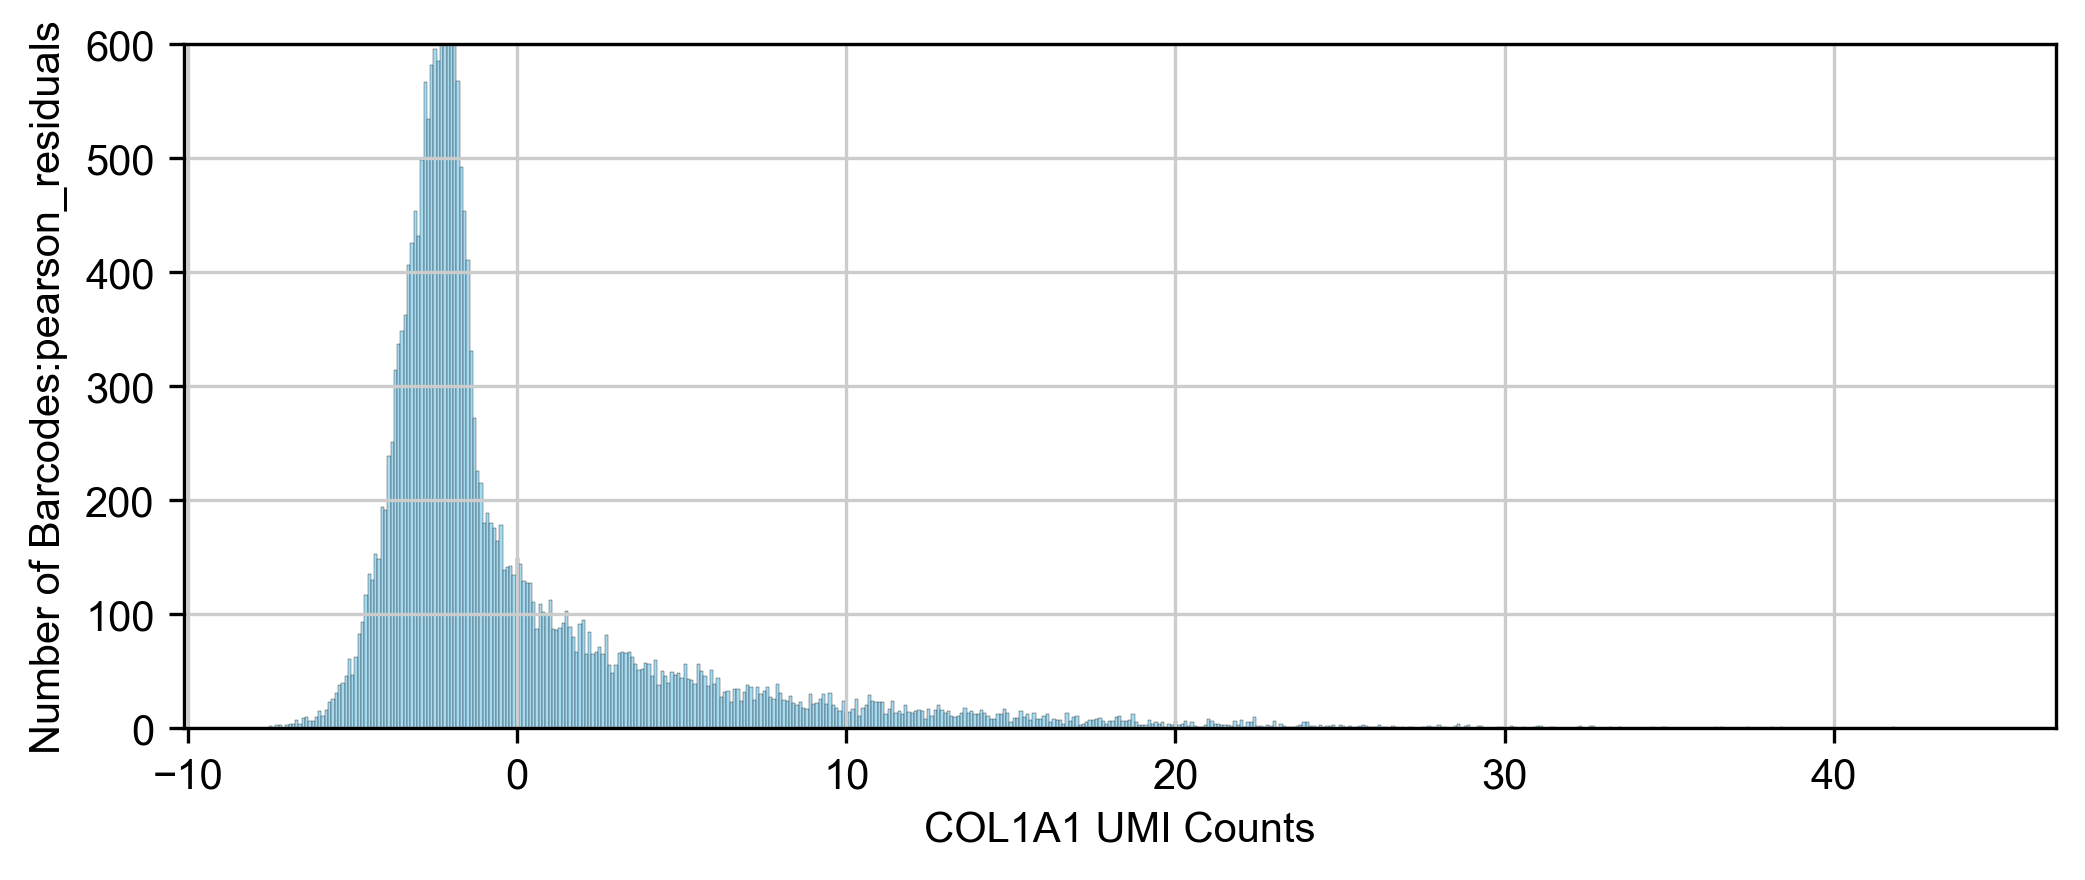

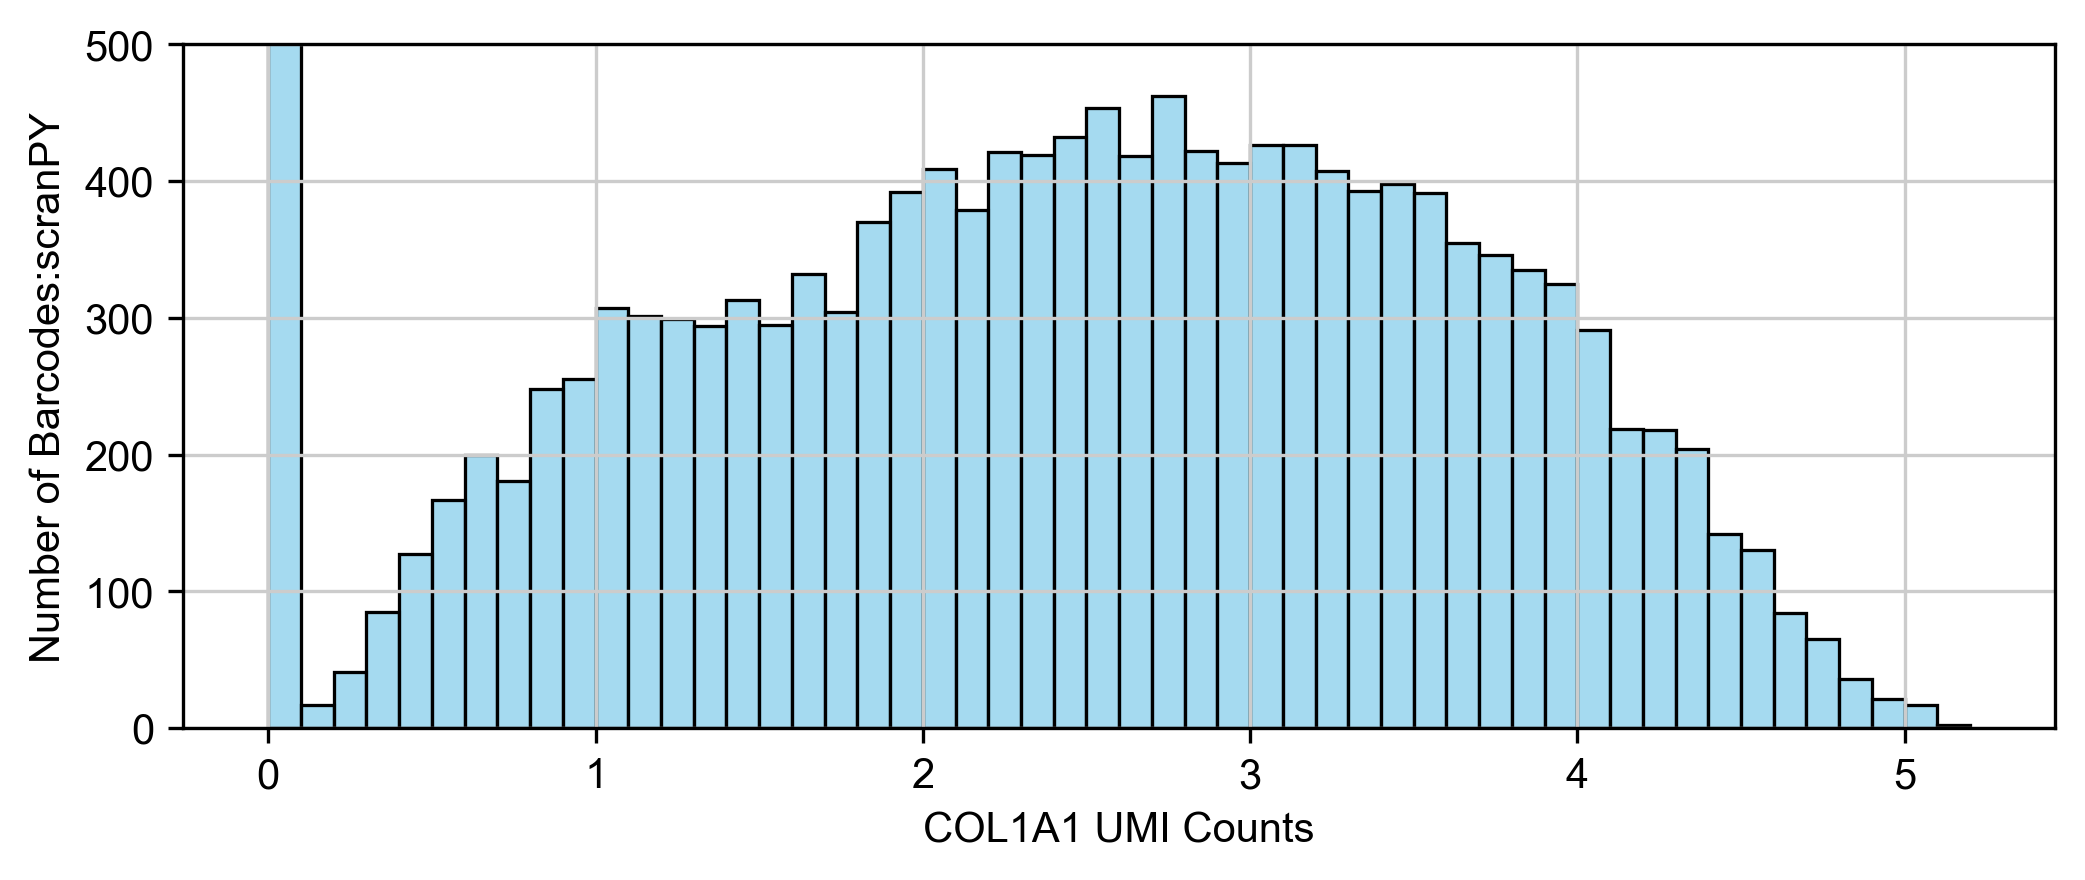

In [25]:
gene_count_histograms('COL1A1', ['counts', 'log1pCP10k', 'log1pPF', 'pearson_residuals', 'scranPY'], [250, 500, 500, 600, 500])

### 9) Plot the mean-variance relationships in the raw and normalised counts to visualise changes. How do those relationships change with each transformation type?

In [26]:
def plot_mean_variance(countslayers, log_scale=False):
    num_layers = len(countslayers)
    num_rows = 2
    num_cols = 3

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    for idx, layer in enumerate(countslayers):
        mean_counts = np.mean(adata.layers[layer].toarray(), axis=1)
        variance = np.var(adata.layers[layer].toarray(), axis=1)

        row_idx = idx // num_cols
        col_idx = idx % num_cols

        ax = axes[row_idx, col_idx]
        ax.scatter(mean_counts, variance, alpha=0.5)

        ax.set_xlabel('Mean Counts')
        if log_scale:
            ax.set_xscale('log')
            #ax.set_yscale('log')
            ax.set_xlabel('Log Mean Counts')

        ax.set_ylabel('Variance')
        ax.set_title(f'Mean-Variance Plot ({layer})')

    plt.tight_layout()
    plt.show()

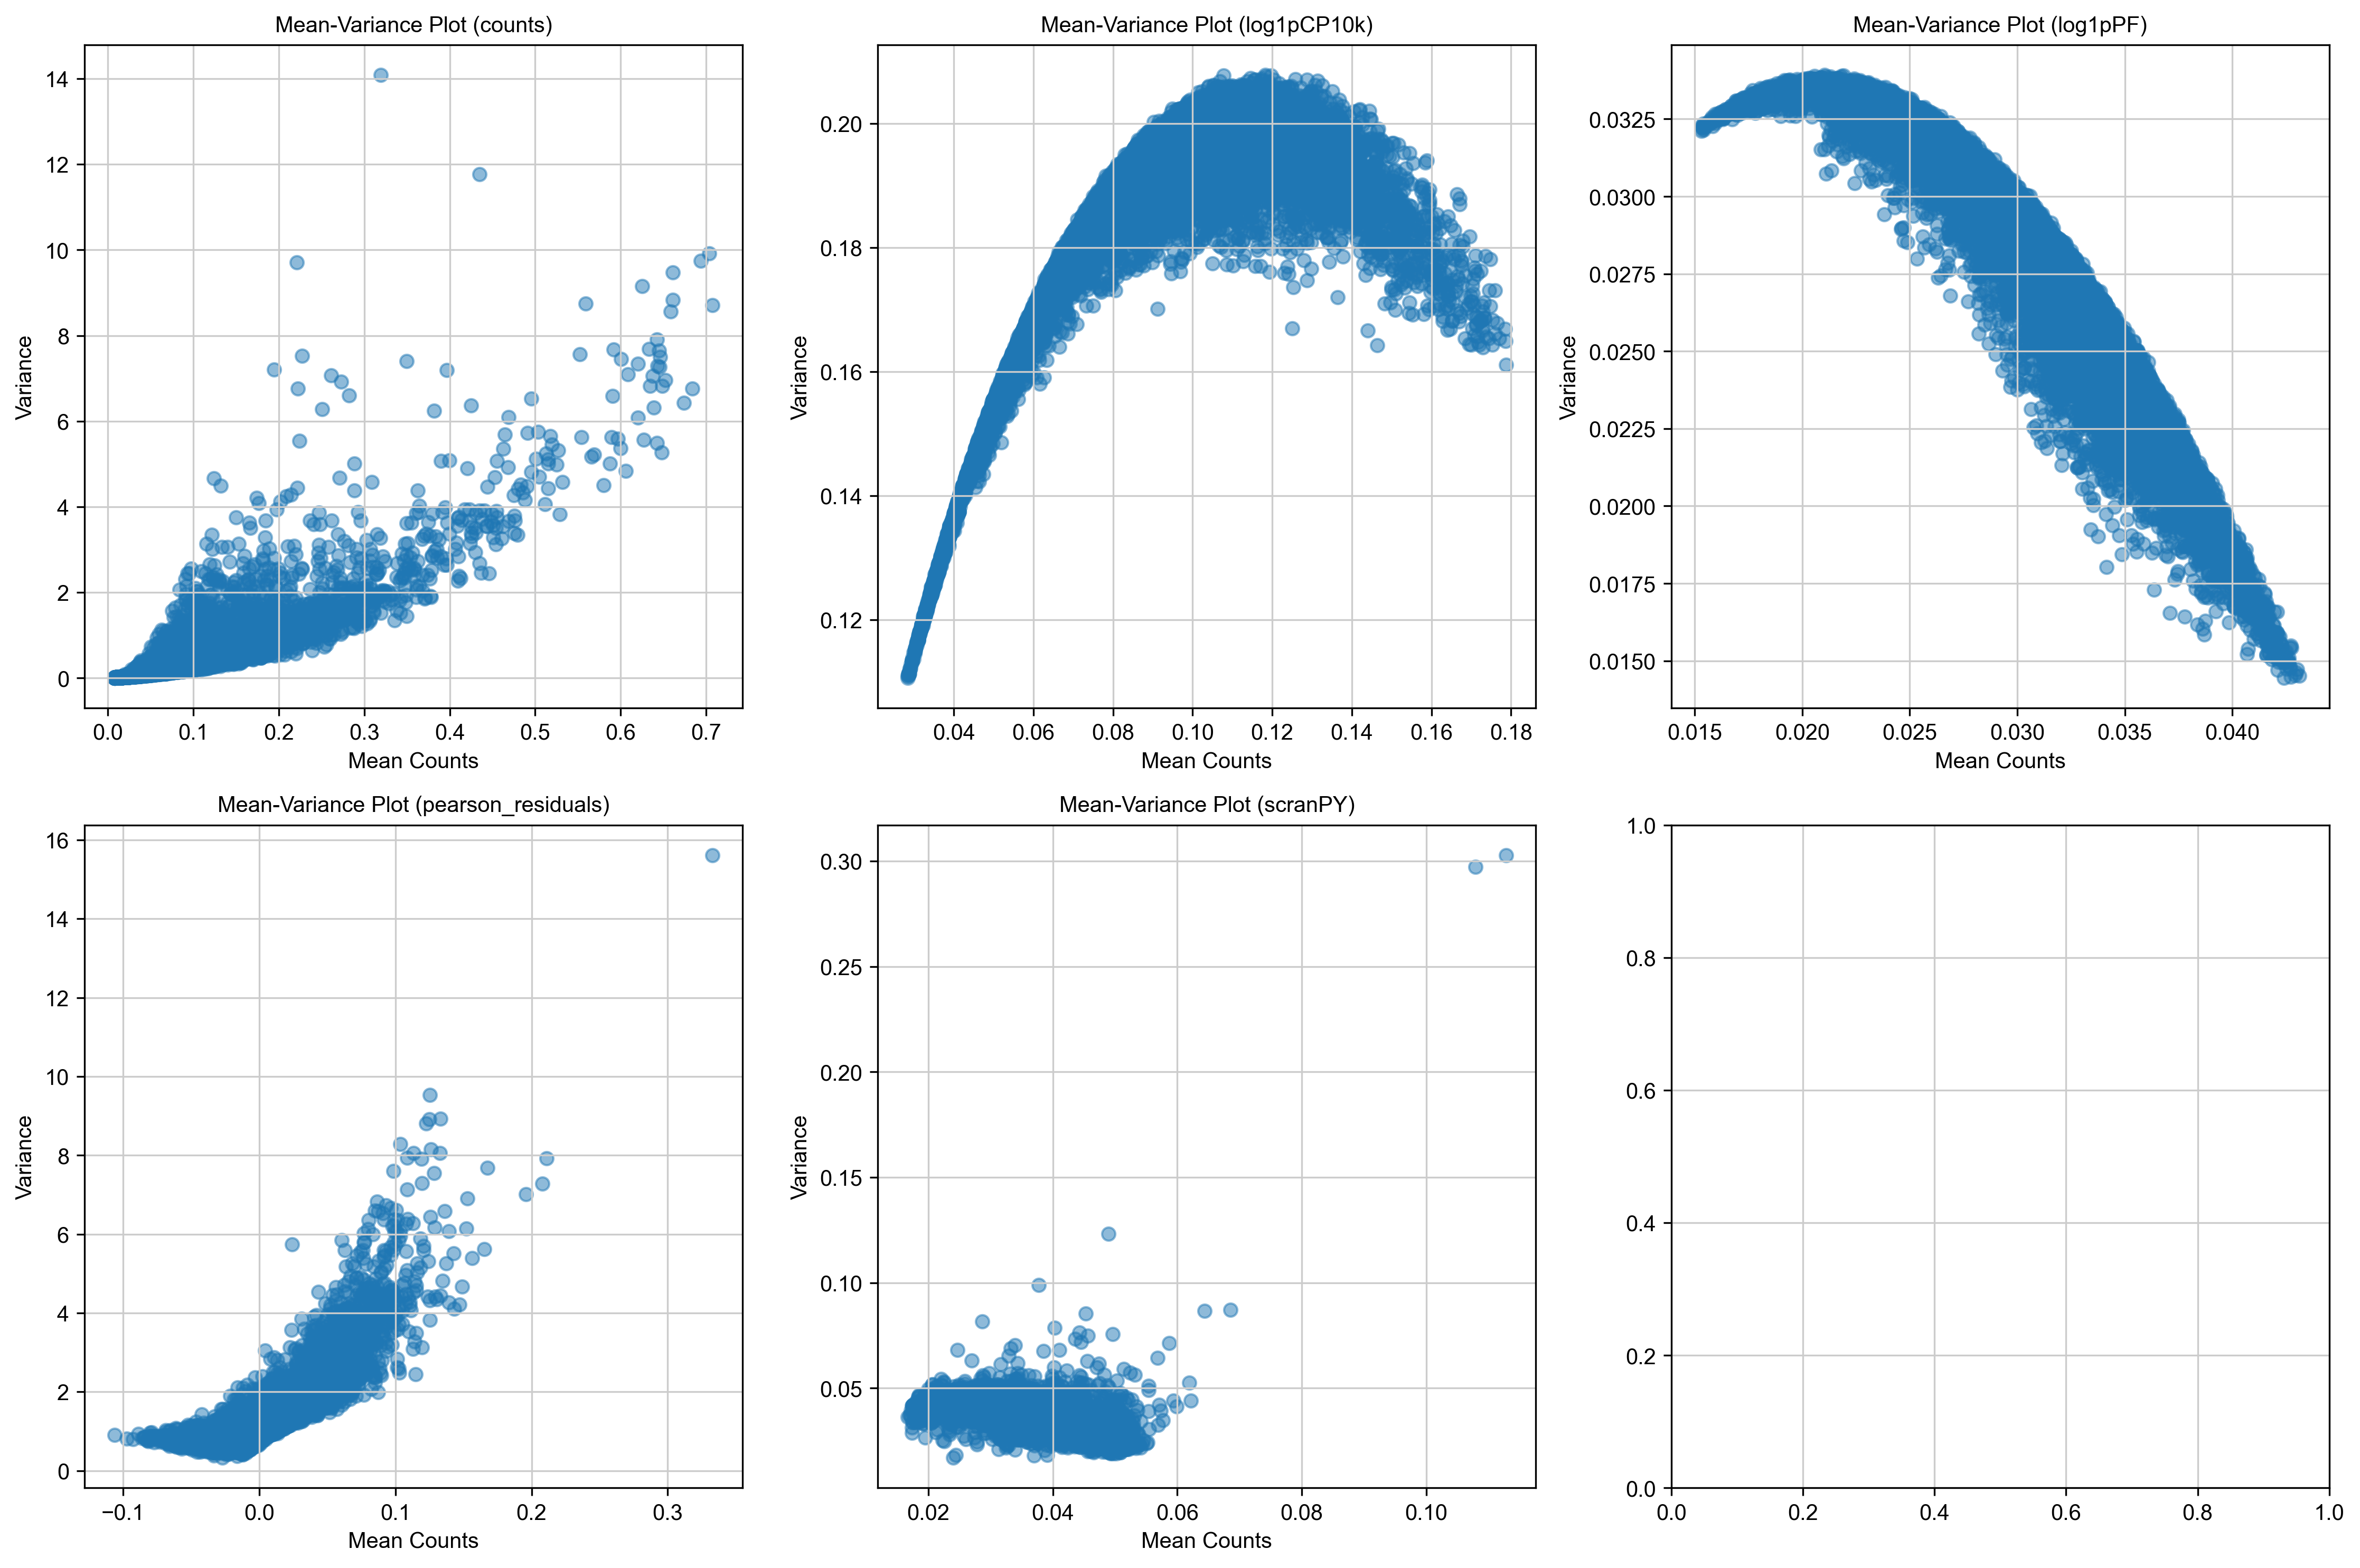

In [27]:
plot_mean_variance(['counts', 'log1pCP10k', 'log1pPF', 'pearson_residuals', 'scranPY'])

### 10) Carry out cell cycle score determination using scranPY-normalized counts and the gene lists provided below. Create a violin plot using sc.pl.violin() visualising the S_score and G2M_score distributions split by sample name.

In [28]:
adata.X = adata.layers["scranPY"].copy()

In [29]:
# genes taken from https://github.com/theislab/scib/tree/main/scib/resources:
g2m_genes = [
    'HMGB2', 'CDK1', 'NUSAP1', 'UBE2C', 'BIRC5', 'TPX2', 'TOP2A', 'NDC80', 'CKS2',
    'NUF2', 'CKS1B', 'MKI67', 'TMPO', 'CENPF', 'TACC3', 'FAM64A', 'SMC4', 'CCNB2',
    'CKAP2L', 'CKAP2', 'AURKB', 'BUB1', 'KIF11', 'ANP32E', 'TUBB4B', 'GTSE1', 'KIF20B',
    'HJURP', 'CDCA3', 'HN1', 'CDC20', 'TTK', 'CDC25C', 'KIF2C', 'RANGAP1', 'NCAPD2',
    'DLGAP5', 'CDCA2', 'CDCA8', 'ECT2', 'KIF23', 'HMMR', 'AURKA', 'PSRC1', 'ANLN', 'LBR',
    'CKAP5', 'CENPE', 'CTCF', 'NEK2', 'G2E3', 'GAS2L3', 'CBX5', 'CENPA'
]

s_genes = [
    'MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG', 'GINS2', 'MCM6',
    'CDCA7', 'DTL', 'PRIM1', 'UHRF1', 'MLF1IP', 'HELLS', 'RFC2', 'RPA2', 'NASP', 'RAD51AP1',
    'GMNN', 'WDR76', 'SLBP', 'CCNE2', 'UBR7', 'POLD3', 'MSH2', 'ATAD2', 'RAD51', 'RRM2',
    'CDC45', 'CDC6', 'EXO1', 'TIPIN', 'DSCC1', 'BLM', 'CASP8AP2', 'USP1', 'CLSPN', 'POLA1',
    'CHAF1B', 'BRIP1', 'E2F8'
]

sc.tl.score_genes_cell_cycle(adata, s_genes, g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    557 total control genes are used. (0:00:00)
computing score 'G2M_score'


/var/folders/5w/wb53h5mn1n5dg1cd34n33ncr0000gn/T/ipykernel_2215/622180476.py:19: FutureWarning: The specified parameters ('s_genes', 'g2m_genes') are no longer positional. Please specify them like `s_genes=['MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG', 'GINS2', 'MCM6', 'CDCA7', 'DTL', 'PRIM1', 'UHRF1', 'MLF1IP', 'HELLS', 'RFC2', 'RPA2', 'NASP', 'RAD51AP1', 'GMNN', 'WDR76', 'SLBP', 'CCNE2', 'UBR7', 'POLD3', 'MSH2', 'ATAD2', 'RAD51', 'RRM2', 'CDC45', 'CDC6', 'EXO1', 'TIPIN', 'DSCC1', 'BLM', 'CASP8AP2', 'USP1', 'CLSPN', 'POLA1', 'CHAF1B', 'BRIP1', 'E2F8']`
  sc.tl.score_genes_cell_cycle(adata, s_genes, g2m_genes)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    602 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


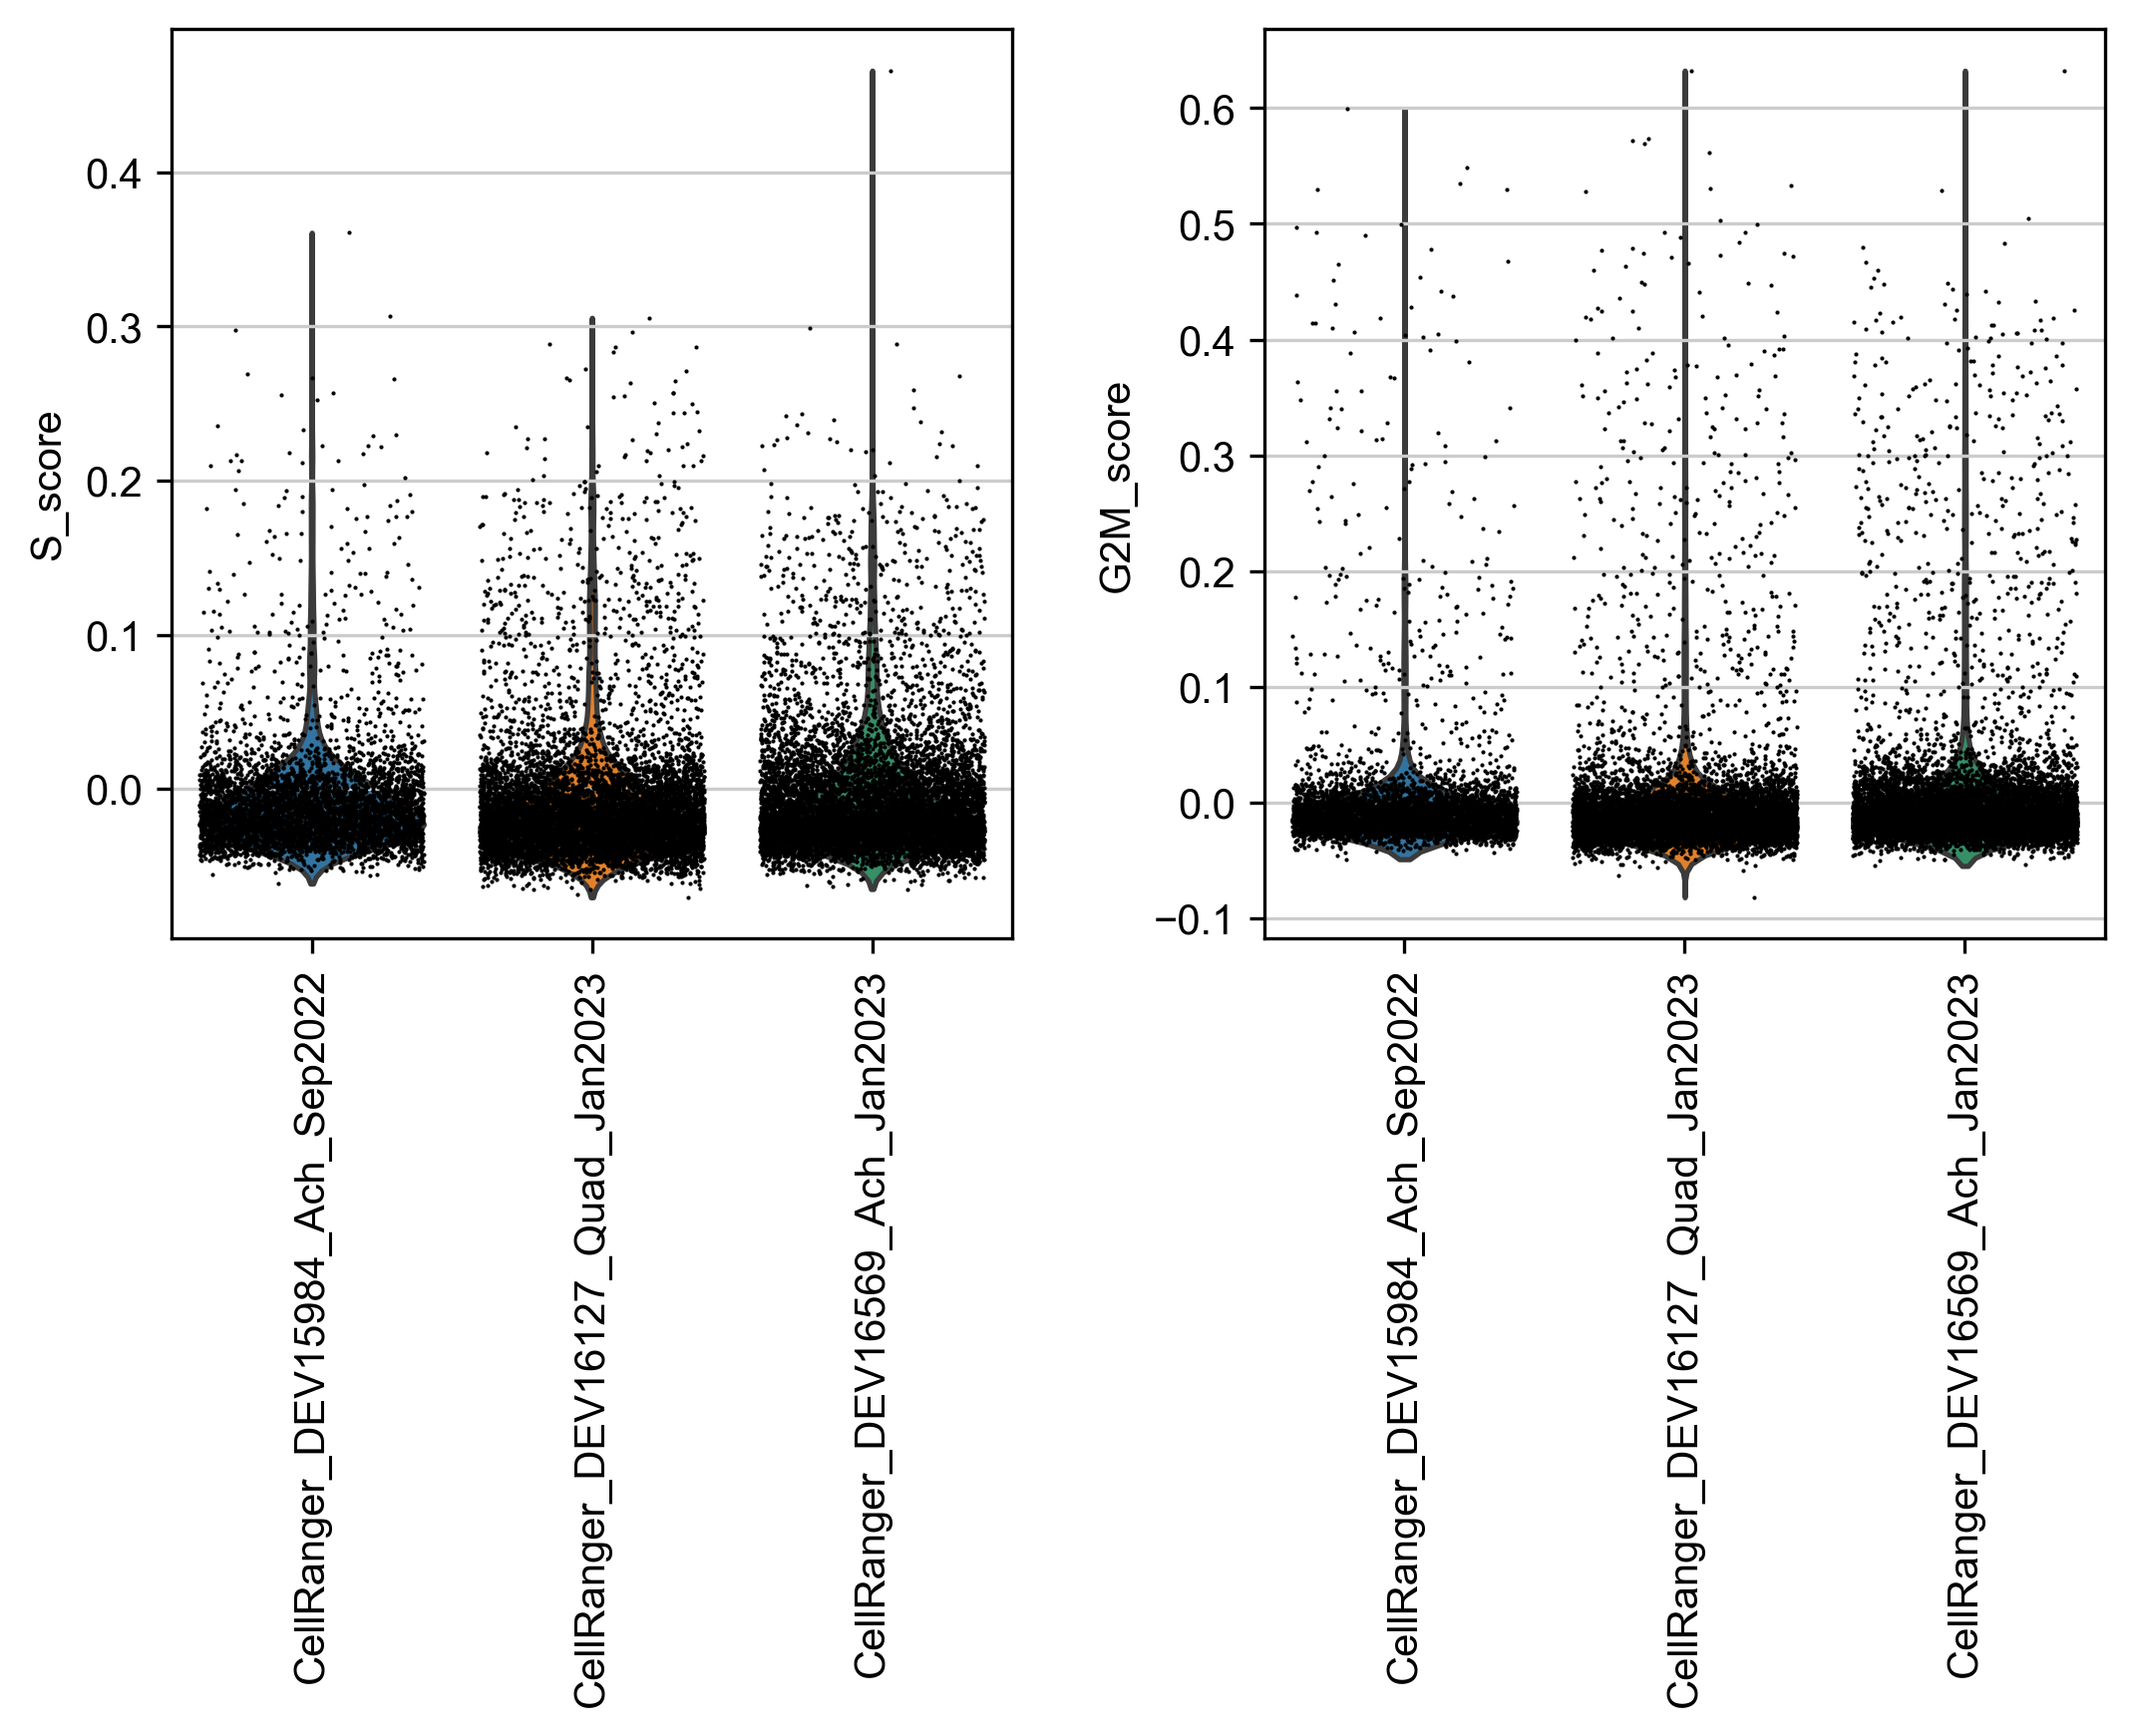

In [30]:
sc.pl.violin(adata, ['S_score', 'G2M_score'],
            jitter=0.4, groupby = 'samplename', rotation=90, 
            )

### 10) Save your work

In [31]:
adata

AnnData object with n_obs × n_vars = 23282 × 27449
    obs: 'samplename', 'sex', 'age', 'donor', 'type', 'libbatch', 'barcode', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'size_factors', 'S_score', 'G2M_score', 'phase'
    uns: 'log1p', 'samplename_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts', 'log1pCP10k', 'log1pPF', 'pearson_residuals', 'scranPY'

In [32]:
adata.write(os.path.join(RESULTS_FOLDERNAME, 'normalised.h5ad'))